## 0. Install and Import Dependencies

In [1]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import seaborn as sns
from seaborn import regplot
from fbprophet.diagnostics import performance_metrics

import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

from fbprophet.diagnostics import cross_validation
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

## 1. Data cleaning and data exploration 

In [2]:
year2020 = pd.read_excel('2020.xlsx')
year2020.head()

Opdrachtgever         Categorie     Project  \
0  Verkeer en Openbare Ruimte  Productieve uren  2980000726   
1  Verkeer en Openbare Ruimte  Productieve uren  2980002072   
2  Verkeer en Openbare Ruimte  Productieve uren  2980002348   
3  Verkeer en Openbare Ruimte  Productieve uren  2980002348   
4  Verkeer en Openbare Ruimte  Productieve uren  2980002524   

                      Projectnaam  Werkorder                  Werkordernaam  \
0   Comeniusstr. ts Geel/Huizinga      23376  Comeniusstr. ts Geel/Huizinga   
1     Onderzk herinr 1e v Swinden      31172  1e v Swindenstr. ON-Ontw. vwb   
2  Herin. eerste Oosterparkstraat      32303        Eerste Oosterparkstr ON   
3  Herin. eerste Oosterparkstraat      32303        Eerste Oosterparkstr ON   
4                    HOV Schinkel      34185                   HOV Schinkel   

                             Fase_Rol  PBI  Asn (aangepast)  Fte  \
0         .IPM - Technisch management  0.0           184320  1.0   
1  .IPM - Integraal Projectmanagement  3.0           270912  1.0   
2         .IPM - Technisch management  5.0           123328  1.0   
3         .IPM - Technisch management  5.0           123328  1.0   
4         .IPM - Technisch management  2.0           974656  1.0   

        Contract                 Werktitel  \
0           Vast  Projectleider uitvoering   
1           Vast             Projectleider   
2           Vast  Projectleider uitvoering   
3           Vast  Projectleider uitvoering   
4  Inhuur Extern             Projectleider   

                            Organisatie  Jaar  Maand  Week      Datum  Uren  \
0  Realisatie Noord, Zuid en Nieuw West  2020      1     1 2020-01-02   2.0   
1                    PM Stad en Regio A  2020      1     1 2020-01-02   3.0   
2       Realisatie Centrum/West en Oost  2020      1     1 2020-01-02   2.0   
3       Realisatie Centrum/West en Oost  2020      1     1 2020-01-03   2.0   
4                    PM Stad en Regio A  2020      1     1 2020-01-03   2.0   

   Tarief  
0    96.0  
1   100.0  
2   105.0  
3   105.0  
4   120.0

In [3]:
year2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367438 entries, 0 to 367437
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Opdrachtgever    367438 non-null  object        
 1   Categorie        367438 non-null  object        
 2   Project          367438 non-null  int64         
 3   Projectnaam      367438 non-null  object        
 4   Werkorder        367438 non-null  int64         
 5   Werkordernaam    367438 non-null  object        
 6   Fase_Rol         367438 non-null  object        
 7   PBI              252354 non-null  float64       
 8   Asn (aangepast)  367438 non-null  int64         
 9   Fte              367425 non-null  float64       
 10  Contract         367438 non-null  object        
 11  Werktitel        367438 non-null  object        
 12  Organisatie      367438 non-null  object        
 13  Jaar             367438 non-null  int64         
 14  Maand            367

In [4]:
year2021 = pd.read_excel('2021.xlsx')
year2021.head()

Opdrachtgever         Categorie     Project  \
0  Verkeer en Openbare Ruimte  Productieve uren  2980002367   
1  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
2  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
3  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
4  Verkeer en Openbare Ruimte  Productieve uren  2980000749   

                           Projectnaam  Werkorder              Werkordernaam  \
0  DNK Touringcarterminal Duivendrecht      33531     DNK Touringcarterminal   
1         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
2         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
3         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
4            Jan de Louter en omgeving      22715  Jan de Louter en omgeving   

                     Fase_Rol  PBI  Asn (aangepast)   Fte Contract  \
0  .IPM - Omgevingsmanagement  0.0           283072  0.89     Vast   
1   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
2   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
3   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
4    .IPM - Projectbeheersing  1.0           875136  1.00     Vast   

                 Werktitel                           Organisatie  Jaar  Maand  \
0  Assistent projectleider                               PM Oost  2021      1   
1           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
2           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
3           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
4                 Adviseur                     Projectbeheersing  2021      1   

   Week      Datum  Uren  Tarief  
0     1 2021-01-04   2.0    93.3  
1     1 2021-01-04   4.0    87.3  
2     1 2021-01-05   4.0    87.3  
3     1 2021-01-06   4.0    87.3  
4     1 2021-01-05   0.5   105.3

In [5]:
year2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701862 entries, 0 to 701861
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Opdrachtgever    701862 non-null  object        
 1   Categorie        701862 non-null  object        
 2   Project          701862 non-null  int64         
 3   Projectnaam      701862 non-null  object        
 4   Werkorder        701862 non-null  int64         
 5   Werkordernaam    701862 non-null  object        
 6   Fase_Rol         701862 non-null  object        
 7   PBI              297748 non-null  float64       
 8   Asn (aangepast)  701862 non-null  int64         
 9   Fte              701783 non-null  float64       
 10  Contract         701862 non-null  object        
 11  Werktitel        701862 non-null  object        
 12  Organisatie      701862 non-null  object        
 13  Jaar             701862 non-null  int64         
 14  Maand            701

In [6]:
frames = [year2020, year2021]
bothyears = pd.concat(frames)
bothyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069300 entries, 0 to 701861
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Opdrachtgever    1069300 non-null  object        
 1   Categorie        1069300 non-null  object        
 2   Project          1069300 non-null  int64         
 3   Projectnaam      1069300 non-null  object        
 4   Werkorder        1069300 non-null  int64         
 5   Werkordernaam    1069300 non-null  object        
 6   Fase_Rol         1069300 non-null  object        
 7   PBI              550102 non-null   float64       
 8   Asn (aangepast)  1069300 non-null  int64         
 9   Fte              1069208 non-null  float64       
 10  Contract         1069300 non-null  object        
 11  Werktitel        1069300 non-null  object        
 12  Organisatie      1069300 non-null  object        
 13  Jaar             1069300 non-null  int64         
 14  Maa

In [7]:
bothyears.isna().sum()

Opdrachtgever           0
Categorie               0
Project                 0
Projectnaam             0
Werkorder               0
Werkordernaam           0
Fase_Rol                0
PBI                519198
Asn (aangepast)         0
Fte                    92
Contract                0
Werktitel               0
Organisatie             0
Jaar                    0
Maand                   0
Week                    0
Datum                   0
Uren                  268
Tarief                  5
dtype: int64

In [8]:
bothyears['PBI'] = bothyears['PBI'].replace(np.nan,0)
bothyears['Fte'] = bothyears['Fte'].replace(np.nan,0)
bothyears['Uren'] = bothyears['Uren'].replace(np.nan,0)
bothyears['Tarief'] = bothyears['Tarief'].replace(np.nan,0)

In [9]:
bothyears.isna().sum()

Opdrachtgever      0
Categorie          0
Project            0
Projectnaam        0
Werkorder          0
Werkordernaam      0
Fase_Rol           0
PBI                0
Asn (aangepast)    0
Fte                0
Contract           0
Werktitel          0
Organisatie        0
Jaar               0
Maand              0
Week               0
Datum              0
Uren               0
Tarief             0
dtype: int64

In [10]:
correlation_matrix = bothyears.corr()
correlation_matrix

Project  Werkorder       PBI  Asn (aangepast)       Fte  \
Project          1.000000   0.932563  0.416088         0.004779  0.016388   
Werkorder        0.932563   1.000000  0.354006         0.002545  0.011238   
PBI              0.416088   0.354006  1.000000        -0.008012 -0.004530   
Asn (aangepast)  0.004779   0.002545 -0.008012         1.000000 -0.028643   
Fte              0.016388   0.011238 -0.004530        -0.028643  1.000000   
Jaar             0.119517   0.146643 -0.185471        -0.001978  0.012448   
Maand           -0.015894   0.003238  0.004976        -0.005800 -0.011594   
Week            -0.019215  -0.000780  0.009811        -0.005778 -0.011899   
Uren            -0.026909  -0.038240 -0.014514        -0.029486  0.017096   
Tarief           0.950392   0.893597  0.408662         0.013027 -0.017692   

                     Jaar     Maand      Week      Uren    Tarief  
Project          0.119517 -0.015894 -0.019215 -0.026909  0.950392  
Werkorder        0.146643  0.003238 -0.000780 -0.038240  0.893597  
PBI             -0.185471  0.004976  0.009811 -0.014514  0.408662  
Asn (aangepast) -0.001978 -0.005800 -0.005778 -0.029486  0.013027  
Fte              0.012448 -0.011594 -0.011899  0.017096 -0.017692  
Jaar             1.000000 -0.034928 -0.061827 -0.056846  0.121032  
Maand           -0.034928  1.000000  0.996137  0.001157 -0.020924  
Week            -0.061827  0.996137  1.000000  0.002338 -0.024371  
Uren            -0.056846  0.001157  0.002338  1.000000 -0.001291  
Tarief           0.121032 -0.020924 -0.024371 -0.001291  1.000000

In [11]:
correlation_matrix[['Uren']]

Uren
Project         -0.026909
Werkorder       -0.038240
PBI             -0.014514
Asn (aangepast) -0.029486
Fte              0.017096
Jaar            -0.056846
Maand            0.001157
Week             0.002338
Uren             1.000000
Tarief          -0.001291

In [12]:
data = bothyears.groupby(['Datum', 'Fase_Rol']).agg({'Uren':sum,}).reset_index()
data.head(5)

Datum                            Fase_Rol    Uren
0 2020-01-01  .IPM - Integraal Projectmanagement    7.20
1 2020-01-01         .IPM - Technisch management    0.00
2 2020-01-01                 Indirect productief   26.70
3 2020-01-02           .IPM - Contractmanagement  116.90
4 2020-01-02  .IPM - Integraal Projectmanagement  335.15

In [13]:
data.shape

(3887, 3)

In [14]:
data['Datum'].unique()

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-01-31

In [15]:
data['Fase_Rol'].value_counts()

.IPM - Technisch management           637
.IPM - Contractmanagement             625
.IPM - Integraal Projectmanagement    542
Indirect productief                   535
.IPM - Omgevingsmanagement            527
.IPM - Projectbeheersing              524
Detachering                           497
Name: Fase_Rol, dtype: int64

In [16]:
role = ['.IPM - Technisch management'] 


# selecting rows based on condition 
technischmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [17]:
role = ['.IPM - Contractmanagement'] 


# selecting rows based on condition 
contractmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [18]:
role = ['.IPM - Integraal Projectmanagement'] 


# selecting rows based on condition 
integraalprojectmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [19]:
role = ['.IPM - Omgevingsmanagement'] 


# selecting rows based on condition 
omgevingsmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [20]:
role = ['.IPM - Projectbeheersing'] 


# selecting rows based on condition 
projectbeheersing  = data.loc[data['Fase_Rol'].isin(role)] 

In [21]:
data['Fase_Rol'].value_counts()

.IPM - Technisch management           637
.IPM - Contractmanagement             625
.IPM - Integraal Projectmanagement    542
Indirect productief                   535
.IPM - Omgevingsmanagement            527
.IPM - Projectbeheersing              524
Detachering                           497
Name: Fase_Rol, dtype: int64

In [22]:
technischmanagement.shape

(637, 3)

In [23]:
technischmanagement.describe()

Uren
count   637.000000
mean   1340.228951
std     942.072229
min       0.000000
25%     694.300000
50%    1233.700000
75%    2364.450000
max    2915.250000

In [24]:
contractmanagement.shape

(625, 3)

In [25]:
contractmanagement.describe()

Uren
count   625.000000
mean    646.634656
std     465.293122
min       0.000000
25%     321.150000
50%     540.200000
75%    1181.580000
max    1439.800000

In [26]:
integraalprojectmanagement.shape

(542, 3)

In [27]:
integraalprojectmanagement.describe()

Uren
count   542.000000
mean    866.982681
std     408.721473
min       0.000000
25%     651.087500
50%     819.775000
75%    1242.787500
max    1648.200000

In [28]:
omgevingsmanagement.shape

(527, 3)

In [29]:
omgevingsmanagement.describe()

Uren
count  527.000000
mean   471.212657
std    168.661828
min      1.000000
25%    383.425000
50%    471.900000
75%    597.900000
max    780.550000

In [30]:
projectbeheersing.shape

(524, 3)

In [31]:
projectbeheersing.describe()

Uren
count   524.000000
mean    665.363040
std     275.959739
min       2.000000
25%     522.337500
50%     588.825000
75%     948.387500
max    1182.050000

<AxesSubplot:xlabel='Datum'>

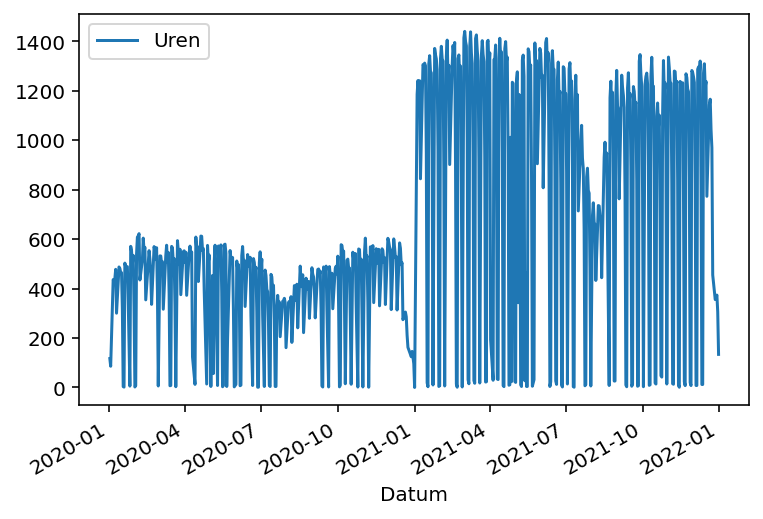

In [32]:
contractmanagement.plot.line(x = 'Datum', y = 'Uren')

<AxesSubplot:xlabel='Datum'>

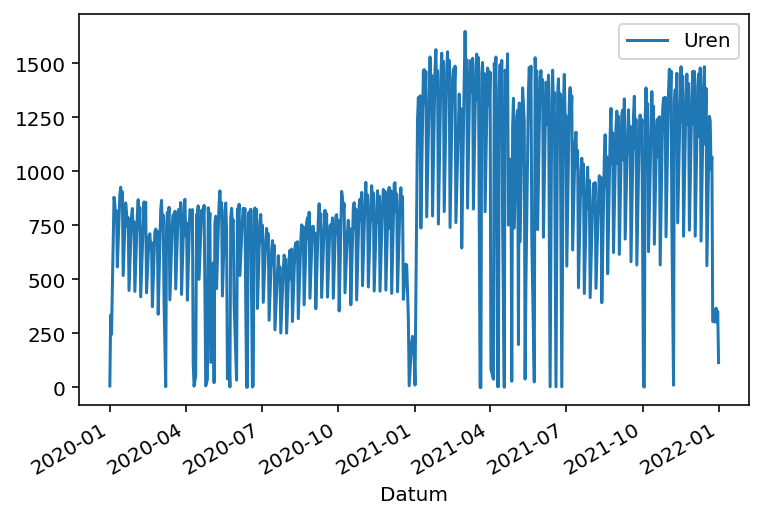

In [33]:
integraalprojectmanagement.plot.line(x = 'Datum', y = 'Uren')

<AxesSubplot:xlabel='Datum'>

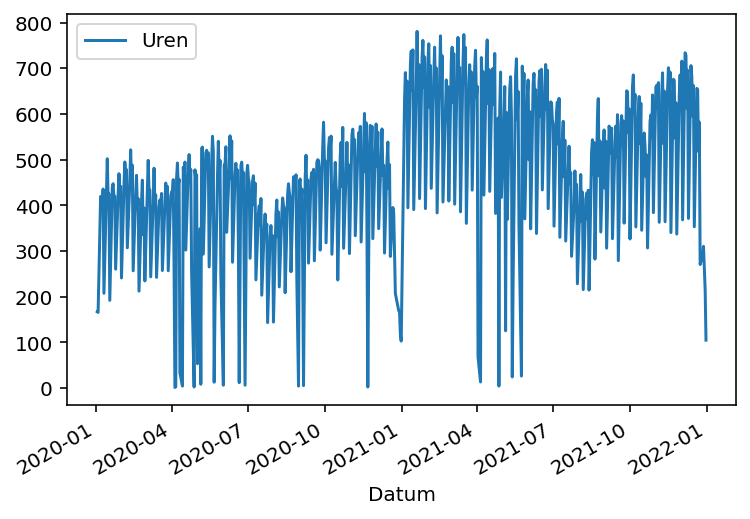

In [34]:
omgevingsmanagement.plot.line(x = 'Datum', y = 'Uren')

<AxesSubplot:xlabel='Datum'>

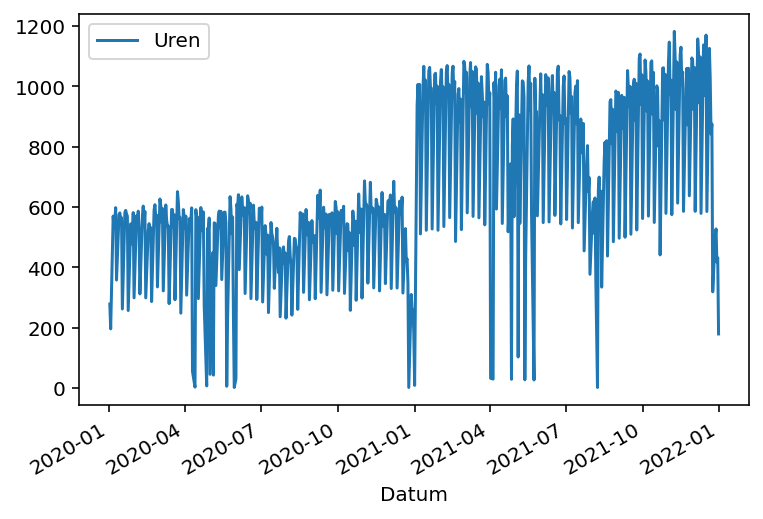

In [35]:
projectbeheersing.plot.line(x = 'Datum', y = 'Uren')

## 2. Preparing the data to train the model

In [36]:
TM1 = technischmanagement.rename(columns={"Datum":"ds"})

In [37]:
TM = TM1.rename(columns={"Uren":"y"})

In [38]:
TM['Fase_Rol'].unique()

array(['.IPM - Technisch management'], dtype=object)

In [39]:
TM = TM.drop(['Fase_Rol'], axis=1)

In [40]:
TM.tail(5)

ds       y
3856 2021-12-27  857.83
3863 2021-12-28  917.23
3870 2021-12-29  785.95
3877 2021-12-30  737.00
3884 2021-12-31  304.95

In [41]:
CM1 = contractmanagement.rename(columns={"Datum":"ds"})

In [42]:
CM = CM1.rename(columns={"Uren":"y"})

In [43]:
CM['Fase_Rol'].unique()

array(['.IPM - Contractmanagement'], dtype=object)

In [44]:
CM = CM.drop(['Fase_Rol'], axis=1)

In [45]:
CM.tail(5)

ds       y
3852 2021-12-27  355.48
3859 2021-12-28  362.73
3866 2021-12-29  373.48
3873 2021-12-30  305.53
3880 2021-12-31  133.83

In [46]:
IP1 = integraalprojectmanagement.rename(columns={"Datum":"ds"})

In [47]:
IP = IP1.rename(columns={"Uren":"y"})

In [48]:
IP['Fase_Rol'].unique()

array(['.IPM - Integraal Projectmanagement'], dtype=object)

In [49]:
IP = IP.drop(['Fase_Rol'], axis=1)

In [50]:
IP.tail(5)

ds       y
3853 2021-12-27  303.50
3860 2021-12-28  366.80
3867 2021-12-29  302.00
3874 2021-12-30  352.00
3881 2021-12-31  115.05

In [51]:
OM1 = omgevingsmanagement.rename(columns={"Datum":"ds"})
OM = OM1.rename(columns={"Uren":"y"})
OM['Fase_Rol'].unique()

array(['.IPM - Omgevingsmanagement'], dtype=object)

In [52]:
OM = OM.drop(['Fase_Rol'], axis=1)

In [53]:
OM.tail(5)

ds       y
3854 2021-12-27  289.35
3861 2021-12-28  310.00
3868 2021-12-29  260.83
3875 2021-12-30  214.75
3882 2021-12-31  104.60

In [54]:
PB1 = projectbeheersing.rename(columns={"Datum":"ds"})
PB = PB1.rename(columns={"Uren":"y"})
PB['Fase_Rol'].unique()

array(['.IPM - Projectbeheersing'], dtype=object)

In [55]:
PB = PB.drop(['Fase_Rol'], axis=1)

In [56]:
PB.tail(5)

ds       y
3855 2021-12-27  503.50
3862 2021-12-28  527.40
3869 2021-12-29  417.66
3876 2021-12-30  431.52
3883 2021-12-31  179.40

## 3. Train Models

In [57]:
#Confidence interval at 95% and daily_seasonality because we have daily_seanality
cm = Prophet(interval_width=0.95, daily_seasonality=True)
modelcm = cm.fit(CM)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [58]:
tm = Prophet(interval_width=0.95, daily_seasonality=True)
modeltm = tm.fit(TM)

In [59]:
pb = Prophet(interval_width=0.95, daily_seasonality=True)
modelpb = pb.fit(PB)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [60]:
ip = Prophet(interval_width=0.95, daily_seasonality=True)
modelip = ip.fit(IP)

In [61]:
om = Prophet(interval_width=0.95, daily_seasonality=True)
modelom = om.fit(OM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## 4. Forecast Away

In [62]:
future = cm.make_future_dataframe(periods=91,freq='D')
forecastcm = cm.predict(future)
forecastcm.head()

ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2020-01-02  135.148870   -1.441590   971.801784   135.148870   135.148870   
1 2020-01-03  135.489231 -260.265484   639.034807   135.489231   135.489231   
2 2020-01-06  136.510313   25.041482   983.899084   136.510313   136.510313   
3 2020-01-07  136.850674   57.782268  1031.823855   136.850674   136.850674   
4 2020-01-08  137.191034   27.290462   967.163429   137.191034   137.191034   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0      355.834318            355.834318            355.834318  73.586749   
1       82.124237             82.124237             82.124237  73.586749   
2      362.112012            362.112012            362.112012  73.586749   
3      403.692717            403.692717            403.692717  73.586749   
4      356.351736            356.351736            356.351736  73.586749   

   daily_lower  daily_upper      weekly  weekly_lower  weekly_upper  \
0    73.586749    73.586749  282.247569    282.247569    282.247569   
1    73.586749    73.586749    8.537488      8.537488      8.537488   
2    73.586749    73.586749  288.525263    288.525263    288.525263   
3    73.586749    73.586749  330.105968    330.105968    330.105968   
4    73.586749    73.586749  282.764987    282.764987    282.764987   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  490.983188  
1                         0.0  217.613468  
2                         0.0  498.622325  
3                         0.0  540.543390  
4                         0.0  493.542770

In [63]:
forecastcm.describe()

trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
count  716.000000  716.000000   716.000000   716.000000   716.000000   
mean   504.405413  182.392053  1147.134153   501.900533   506.911277   
std    234.182035  386.460822   386.885667   232.050583   236.596560   
min    135.148870 -909.460762    57.565513   135.148870   135.148870   
25%    221.863897   -7.119329   961.490222   221.863897   221.863897   
50%    646.890699  228.471253  1199.517445   646.890699   646.890699   
75%    715.148730  569.689625  1530.706815   714.246064   715.148730   
max    717.001692  681.921104  1644.293661   716.099031   765.006838   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count      716.000000            716.000000            716.000000   
mean       160.493379            160.493379            160.493379   
std        338.860631            338.860631            338.860631   
min       -527.556546           -527.556546           -527.556546   
25%         82.124237             82.124237             82.124237   
50%        355.834318            355.834318            355.834318   
75%        362.112012            362.112012            362.112012   
max        403.692717            403.692717            403.692717   

              daily   daily_lower   daily_upper      weekly  weekly_lower  \
count  7.160000e+02  7.160000e+02  7.160000e+02  716.000000    716.000000   
mean   7.358675e+01  7.358675e+01  7.358675e+01   86.906630     86.906630   
std    5.261692e-13  5.261692e-13  5.261692e-13  338.860631    338.860631   
min    7.358675e+01  7.358675e+01  7.358675e+01 -601.143295   -601.143295   
25%    7.358675e+01  7.358675e+01  7.358675e+01    8.537488      8.537488   
50%    7.358675e+01  7.358675e+01  7.358675e+01  282.247569    282.247569   
75%    7.358675e+01  7.358675e+01  7.358675e+01  288.525263    288.525263   
max    7.358675e+01  7.358675e+01  7.358675e+01  330.105968    330.105968   

       weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
count    716.000000                 716.0                       716.0   
mean      86.906630                   0.0                         0.0   
std      338.860631                   0.0                         0.0   
min     -601.143295                   0.0                         0.0   
25%        8.537488                   0.0                         0.0   
50%      282.247569                   0.0                         0.0   
75%      288.525263                   0.0                         0.0   
max      330.105968                   0.0                         0.0   

       multiplicative_terms_upper         yhat  
count                       716.0   716.000000  
mean                          0.0   664.898792  
std                           0.0   387.063785  
min                           0.0  -386.961905  
25%                           0.0   493.498506  
50%                           0.0   711.242336  
75%                           0.0  1070.175665  
max                           0.0  1120.664320

In [64]:
#period is one kwarter because my manager asked for that, and the frequenties are days
future = tm.make_future_dataframe(periods=91,freq='D')
forecasttm = tm.predict(future)
forecasttm.head()

ds      trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2020-01-01  15.396153  -744.330029   808.126842    15.396153    15.396153   
1 2020-01-02  18.518815  -608.909702   942.255683    18.518815    18.518815   
2 2020-01-03  21.641478 -1126.527263   405.806955    21.641478    21.641478   
3 2020-01-06  31.009465  -288.307789  1322.668790    31.009465    31.009465   
4 2020-01-07  34.132128   -79.664938  1479.557994    34.132128    34.132128   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  ...  \
0        6.353464              6.353464              6.353464  61.773037  ...   
1      157.954879            157.954879            157.954879  61.773037  ...   
2     -431.930824           -431.930824           -431.930824  61.773037  ...   
3      504.722514            504.722514            504.722514  61.773037  ...   
4      655.698588            655.698588            655.698588  61.773037  ...   

       weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0  551.930840    551.930840    551.930840 -607.350413   -607.350413   
1  633.466876    633.466876    633.466876 -537.285034   -537.285034   
2  -32.982663    -32.982663    -32.982663 -460.721198   -460.721198   
3  646.392807    646.392807    646.392807 -203.443330   -203.443330   
4  706.600283    706.600283    706.600283 -112.674731   -112.674731   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   -607.350413                   0.0                         0.0   
1   -537.285034                   0.0                         0.0   
2   -460.721198                   0.0                         0.0   
3   -203.443330                   0.0                         0.0   
4   -112.674731                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0   21.749616  
1                         0.0  176.473694  
2                         0.0 -410.289347  
3                         0.0  535.731979  
4                         0.0  689.830716  

[5 rows x 22 columns]

In [65]:
forecasttm.describe()

trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
count   728.000000   728.000000   728.000000   728.000000   728.000000   
mean   1200.748767   689.194435  2249.832988  1200.020206  1201.424319   
std     600.989987   920.110799   920.709832   599.994272   601.920154   
min      15.396153 -1647.644676   -94.939695    15.396153    15.396153   
25%     685.207203   191.492507  1750.369431   685.207203   685.207203   
50%    1330.718613   670.292322  2220.623374  1330.718613  1330.718613   
75%    1719.295709  1469.682322  3032.213884  1719.295709  1719.295709   
max    2075.170939  2606.072687  4203.440907  2061.626262  2087.409368   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count      728.000000            728.000000            728.000000   
mean       268.690958            268.690958            268.690958   
std        783.085126            783.085126            783.085126   
min      -1952.668172          -1952.668172          -1952.668172   
25%       -111.725404           -111.725404           -111.725404   
50%        516.554312            516.554312            516.554312   
75%        855.370027            855.370027            855.370027   
max       1470.680059           1470.680059           1470.680059   

              daily   daily_lower  ...       weekly  weekly_lower  \
count  7.280000e+02  7.280000e+02  ...   728.000000    728.000000   
mean   6.177304e+01  6.177304e+01  ...   164.487329    164.487329   
std    7.536931e-13  7.536931e-13  ...   731.295228    731.295228   
min    6.177304e+01  6.177304e+01  ... -1287.711487  -1287.711487   
25%    6.177304e+01  6.177304e+01  ...   -32.982663    -32.982663   
50%    6.177304e+01  6.177304e+01  ...   551.930840    551.930840   
75%    6.177304e+01  6.177304e+01  ...   646.392807    646.392807   
max    6.177304e+01  6.177304e+01  ...   706.600283    706.600283   

       weekly_upper      yearly  yearly_lower  yearly_upper  \
count    728.000000  728.000000    728.000000    728.000000   
mean     164.487329   42.430592     42.430592     42.430592   
std      731.295228  313.738332    313.738332    313.738332   
min    -1287.711487 -853.210292   -853.210292   -853.210292   
25%      -32.982663 -175.701059   -175.701059   -175.701059   
50%      551.930840   56.502490     56.502490     56.502490   
75%      646.392807  253.503967    253.503967    253.503967   
max      706.600283  703.483297    703.483297    703.483297   

       multiplicative_terms  multiplicative_terms_lower  \
count                 728.0                       728.0   
mean                    0.0                         0.0   
std                     0.0                         0.0   
min                     0.0                         0.0   
25%                     0.0                         0.0   
50%                     0.0                         0.0   
75%                     0.0                         0.0   
max                     0.0                         0.0   

       multiplicative_terms_upper         yhat  
count                       728.0   728.000000  
mean                          0.0  1469.439725  
std                           0.0   919.672897  
min                           0.0  -909.778475  
25%                           0.0   983.525567  
50%                           0.0  1444.568784  
75%                           0.0  2252.821996  
max                           0.0  3370.077322  

[8 rows x 21 columns]

In [66]:
future = ip.make_future_dataframe(periods=91,freq='D')
forecastip = ip.predict(future)
forecastip

ds       trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-01-01   41.415233  -244.995677   539.582884    41.415233   
1   2020-01-02   42.681498  -124.925678   625.096729    42.681498   
2   2020-01-03   43.947763  -597.733229   182.160262    43.947763   
3   2020-01-06   47.746558    33.912642   783.765616    47.746558   
4   2020-01-07   49.012823   181.566356   929.154091    49.012823   
..         ...         ...          ...          ...          ...   
628 2022-03-28  959.502023  1239.898211  2024.279501   956.058992   
629 2022-03-29  960.474222  1311.607729  2070.758307   956.986712   
630 2022-03-30  961.446422  1223.558551  1957.061298   957.914432   
631 2022-03-31  962.418622  1294.902298  2068.219873   958.842151   
632 2022-04-01  963.390822   744.972600  1500.137531   959.769871   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      41.415233       92.879025             92.879025             92.879025   
1      42.681498      227.303502            227.303502            227.303502   
2      43.947763     -249.205565           -249.205565           -249.205565   
3      47.746558      361.659142            361.659142            361.659142   
4      49.012823      501.633113            501.633113            501.633113   
..           ...             ...                   ...                   ...   
628   962.668392      660.190371            660.190371            660.190371   
629   963.684295      745.220088            745.220088            745.220088   
630   964.700198      617.822591            617.822591            617.822591   
631   965.715855      710.527466            710.527466            710.527466   
632   966.718601      187.952110            187.952110            187.952110   

          daily  ...      weekly  weekly_lower  weekly_upper      yearly  \
0    137.076284  ...  311.401383    311.401383    311.401383 -355.598643   
1    137.076284  ...  406.537673    406.537673    406.537673 -316.310456   
2    137.076284  ... -113.299101   -113.299101   -113.299101 -272.982748   
3    137.076284  ...  349.620328    349.620328    349.620328 -125.037470   
4    137.076284  ...  436.625282    436.625282    436.625282  -72.068454   
..          ...  ...         ...           ...           ...         ...   
628  137.076284  ...  349.620328    349.620328    349.620328  173.493759   
629  137.076284  ...  436.625282    436.625282    436.625282  171.518522   
630  137.076284  ...  311.401383    311.401383    311.401383  169.344924   
631  137.076284  ...  406.537673    406.537673    406.537673  166.913508   
632  137.076284  ... -113.299101   -113.299101   -113.299101  164.174927   

     yearly_lower  yearly_upper  multiplicative_terms  \
0     -355.598643   -355.598643                   0.0   
1     -316.310456   -316.310456                   0.0   
2     -272.982748   -272.982748                   0.0   
3     -125.037470   -125.037470                   0.0   
4      -72.068454    -72.068454                   0.0   
..            ...           ...                   ...   
628    173.493759    173.493759                   0.0   
629    171.518522    171.518522                   0.0   
630    169.344924    169.344924                   0.0   
631    166.913508    166.913508                   0.0   
632    164.174927    164.174927                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0   134.294258  
1                           0.0                         0.0   269.985000  
2                           0.0                         0.0  -205.257802  
3                           0.0                         0.0   409.405700  
4                           0.0                         0.0   550.645936  
..                          ...                         ...          ...  
628                         0.0                         0.0  1619.692393  
629                     

In [67]:
forecastip.describe()

trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
count  633.000000   633.000000   633.000000   633.000000   633.000000   
mean   547.158719   544.946998  1305.127747   546.942917   547.359706   
std    272.814751   410.993404   408.492829   272.505372   273.104003   
min     41.415233  -704.262023    55.725783    41.415233    41.415233   
25%    307.330884   311.819170  1079.334493   307.330884   307.330884   
50%    583.430099   501.826698  1257.116806   583.430099   583.430099   
75%    787.422654   844.462804  1602.889415   787.422654   787.422654   
max    963.390822  1529.887369  2290.324093   959.769871   966.718601   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count      633.000000            633.000000            633.000000   
mean       378.360304            378.360304            378.360304   
std        350.933625            350.933625            350.933625   
min       -905.396456           -905.396456           -905.396456   
25%        200.458396            200.458396            200.458396   
50%        446.332337            446.332337            446.332337   
75%        631.424505            631.424505            631.424505   
max       1017.676396           1017.676396           1017.676396   

              daily   daily_lower  ...      weekly  weekly_lower  \
count  6.330000e+02  6.330000e+02  ...  633.000000    633.000000   
mean   1.370763e+02  1.370763e+02  ...  208.582607    208.582607   
std    5.404395e-13  5.404395e-13  ...  316.502130    316.502130   
min    1.370763e+02  1.370763e+02  ... -705.978450   -705.978450   
25%    1.370763e+02  1.370763e+02  ... -113.299101   -113.299101   
50%    1.370763e+02  1.370763e+02  ...  349.620328    349.620328   
75%    1.370763e+02  1.370763e+02  ...  406.537673    406.537673   
max    1.370763e+02  1.370763e+02  ...  436.625282    436.625282   

       weekly_upper      yearly  yearly_lower  yearly_upper  \
count    633.000000  633.000000    633.000000    633.000000   
mean     208.582607   32.701413     32.701413     32.701413   
std      316.502130  197.525077    197.525077    197.525077   
min     -705.978450 -483.958583   -483.958583   -483.958583   
25%     -113.299101  -94.357318    -94.357318    -94.357318   
50%      349.620328   20.511053     20.511053     20.511053   
75%      406.537673  185.295791    185.295791    185.295791   
max      436.625282  449.439200    449.439200    449.439200   

       multiplicative_terms  multiplicative_terms_lower  \
count                 633.0                       633.0   
mean                    0.0                         0.0   
std                     0.0                         0.0   
min                     0.0                         0.0   
25%                     0.0                         0.0   
50%                     0.0                         0.0   
75%                     0.0                         0.0   
max                     0.0                         0.0   

       multiplicative_terms_upper         yhat  
count                       633.0   633.000000  
mean                          0.0   925.519023  
std                           0.0   408.846294  
min                           0.0  -353.422581  
25%                           0.0   694.755814  
50%                           0.0   888.569116  
75%                           0.0  1226.243634  
max                           0.0  1905.091703  

[8 rows x 21 columns]

In [68]:
future = om.make_future_dataframe(periods=91,freq='D')
forecastom = om.predict(future)
forecastom.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-02  180.939439  199.161885  620.780885   180.939439   180.939439   
1 2020-01-03  181.262534  -28.621043  410.967144   181.262534   181.262534   
2 2020-01-06  182.231817  202.851770  604.810062   182.231817   182.231817   
3 2020-01-07  182.554911  221.766044  664.026796   182.554911   182.554911   
4 2020-01-08  182.878006  148.229236  597.884258   182.878006   182.878006   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0      227.647306            227.647306            227.647306  58.043265   
1       -2.747392             -2.747392             -2.747392  58.043265   
2      207.210880            207.210880            207.210880  58.043265   
3      256.750620            256.750620            256.750620  58.043265   
4      189.929641            189.929641            189.929641  58.043265   

   daily_lower  daily_upper      weekly  weekly_lower  weekly_upper  \
0    58.043265    58.043265  169.604041    169.604041    169.604041   
1    58.043265    58.043265  -60.790657    -60.790657    -60.790657   
2    58.043265    58.043265  149.167615    149.167615    149.167615   
3    58.043265    58.043265  198.707355    198.707355    198.707355   
4    58.043265    58.043265  131.886376    131.886376    131.886376   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  408.586745  
1                         0.0  178.515142  
2                         0.0  389.442697  
3                         0.0  439.305531  
4                         0.0  372.807647

In [69]:
forecastom.describe()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
count  618.000000  618.000000  618.000000   618.000000   618.000000   
mean   308.629324  243.020937  682.449805   308.146679   309.056583   
std     60.158182  138.781803  138.930903    59.804047    60.500957   
min    180.939439 -245.403955  181.851705   180.939439   180.939439   
25%    255.215768  158.905226  604.750351   255.215768   255.215768   
50%    353.385923  292.549277  727.645079   348.157909   353.385923   
75%    356.516028  346.931176  786.117805   356.516028   357.283362   
max    358.756561  411.956497  850.825373   358.756561   361.821488   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count      618.000000            618.000000            618.000000   
mean       154.073378            154.073378            154.073378   
std        128.988296            128.988296            128.988296   
min       -248.092540           -248.092540           -248.092540   
25%        189.929641            189.929641            189.929641   
50%        207.210880            207.210880            207.210880   
75%        227.647306            227.647306            227.647306   
max        256.750620            256.750620            256.750620   

              daily   daily_lower   daily_upper      weekly  weekly_lower  \
count  6.180000e+02  6.180000e+02  6.180000e+02  618.000000    618.000000   
mean   5.804327e+01  5.804327e+01  5.804327e+01   96.030113     96.030113   
std    2.560026e-13  2.560026e-13  2.560026e-13  128.988296    128.988296   
min    5.804327e+01  5.804327e+01  5.804327e+01 -306.135806   -306.135806   
25%    5.804327e+01  5.804327e+01  5.804327e+01  131.886376    131.886376   
50%    5.804327e+01  5.804327e+01  5.804327e+01  149.167615    149.167615   
75%    5.804327e+01  5.804327e+01  5.804327e+01  169.604041    169.604041   
max    5.804327e+01  5.804327e+01  5.804327e+01  198.707355    198.707355   

       weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
count    618.000000                 618.0                       618.0   
mean      96.030113                   0.0                         0.0   
std      128.988296                   0.0                         0.0   
min     -306.135806                   0.0                         0.0   
25%      131.886376                   0.0                         0.0   
50%      149.167615                   0.0                         0.0   
75%      169.604041                   0.0                         0.0   
max      198.707355                   0.0                         0.0   

       multiplicative_terms_upper        yhat  
count                       618.0  618.000000  
mean                          0.0  462.702702  
std                           0.0  138.668000  
min                           0.0  -37.105319  
25%                           0.0  384.681367  
50%                           0.0  508.549296  
75%                           0.0  564.475977  
max                           0.0  615.460564

In [70]:
future = pb.make_future_dataframe(periods=91,freq='D')
forecastpb = pb.predict(future)
forecastpb.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-02  274.471010  212.637450  837.934264   274.471010   274.471010   
1 2020-01-03  274.734258 -191.560297  488.667773   274.734258   274.734258   
2 2020-01-06  275.524000  202.540815  849.037161   275.524000   275.524000   
3 2020-01-07  275.787247  220.563298  870.671254   275.787247   275.787247   
4 2020-01-08  276.050495  155.777919  832.506644   276.050495   276.050495   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0      246.204222            246.204222            246.204222 -13.768056   
1     -101.245606           -101.245606           -101.245606 -13.768056   
2      257.588761            257.588761            257.588761 -13.768056   
3      272.421400            272.421400            272.421400 -13.768056   
4      200.911209            200.911209            200.911209 -13.768056   

   daily_lower  daily_upper      weekly  weekly_lower  weekly_upper  \
0   -13.768056   -13.768056  259.972278    259.972278    259.972278   
1   -13.768056   -13.768056  -87.477550    -87.477550    -87.477550   
2   -13.768056   -13.768056  271.356817    271.356817    271.356817   
3   -13.768056   -13.768056  286.189456    286.189456    286.189456   
4   -13.768056   -13.768056  214.679265    214.679265    214.679265   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  520.675232  
1                         0.0  173.488652  
2                         0.0  533.112761  
3                         0.0  548.208647  
4                         0.0  476.961704

In [71]:
 forecastpb.describe()

trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
count  615.000000  615.000000   615.000000   615.000000   615.000000   
mean   533.313864  352.710359  1003.914353   532.461593   534.349842   
std    174.802130  238.918250   239.400106   173.639827   176.254075   
min    274.471010 -334.854000   326.064017   274.471010   274.471010   
25%    340.072556  217.743228   864.536745   340.072556   340.072556   
50%    567.246513  339.378149   988.917678   567.246513   567.246513   
75%    693.291328  562.034195  1217.286238   693.291328   693.291328   
max    788.431853  745.404847  1411.634363   774.499631   804.975116   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count      615.000000            615.000000            615.000000   
mean       144.733866            144.733866            144.733866   
std        198.194627            198.194627            198.194627   
min       -660.704939           -660.704939           -660.704939   
25%        200.911209            200.911209            200.911209   
50%        246.204222            246.204222            246.204222   
75%        257.588761            257.588761            257.588761   
max        272.421400            272.421400            272.421400   

              daily   daily_lower   daily_upper      weekly  weekly_lower  \
count  6.150000e+02  6.150000e+02  6.150000e+02  615.000000    615.000000   
mean  -1.376806e+01 -1.376806e+01 -1.376806e+01  158.501922    158.501922   
std    1.902249e-13  1.902249e-13  1.902249e-13  198.194627    198.194627   
min   -1.376806e+01 -1.376806e+01 -1.376806e+01 -646.936883   -646.936883   
25%   -1.376806e+01 -1.376806e+01 -1.376806e+01  214.679265    214.679265   
50%   -1.376806e+01 -1.376806e+01 -1.376806e+01  259.972278    259.972278   
75%   -1.376806e+01 -1.376806e+01 -1.376806e+01  271.356817    271.356817   
max   -1.376806e+01 -1.376806e+01 -1.376806e+01  286.189456    286.189456   

       weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
count    615.000000                 615.0                       615.0   
mean     158.501922                   0.0                         0.0   
std      198.194627                   0.0                         0.0   
min     -646.936883                   0.0                         0.0   
25%      214.679265                   0.0                         0.0   
50%      259.972278                   0.0                         0.0   
75%      271.356817                   0.0                         0.0   
max      286.189456                   0.0                         0.0   

       multiplicative_terms_upper         yhat  
count                       615.0   615.000000  
mean                          0.0   678.047730  
std                           0.0   238.670745  
min                           0.0     1.230216  
25%                           0.0   541.517045  
50%                           0.0   664.427920  
75%                           0.0   888.907507  
max                           0.0  1059.245244

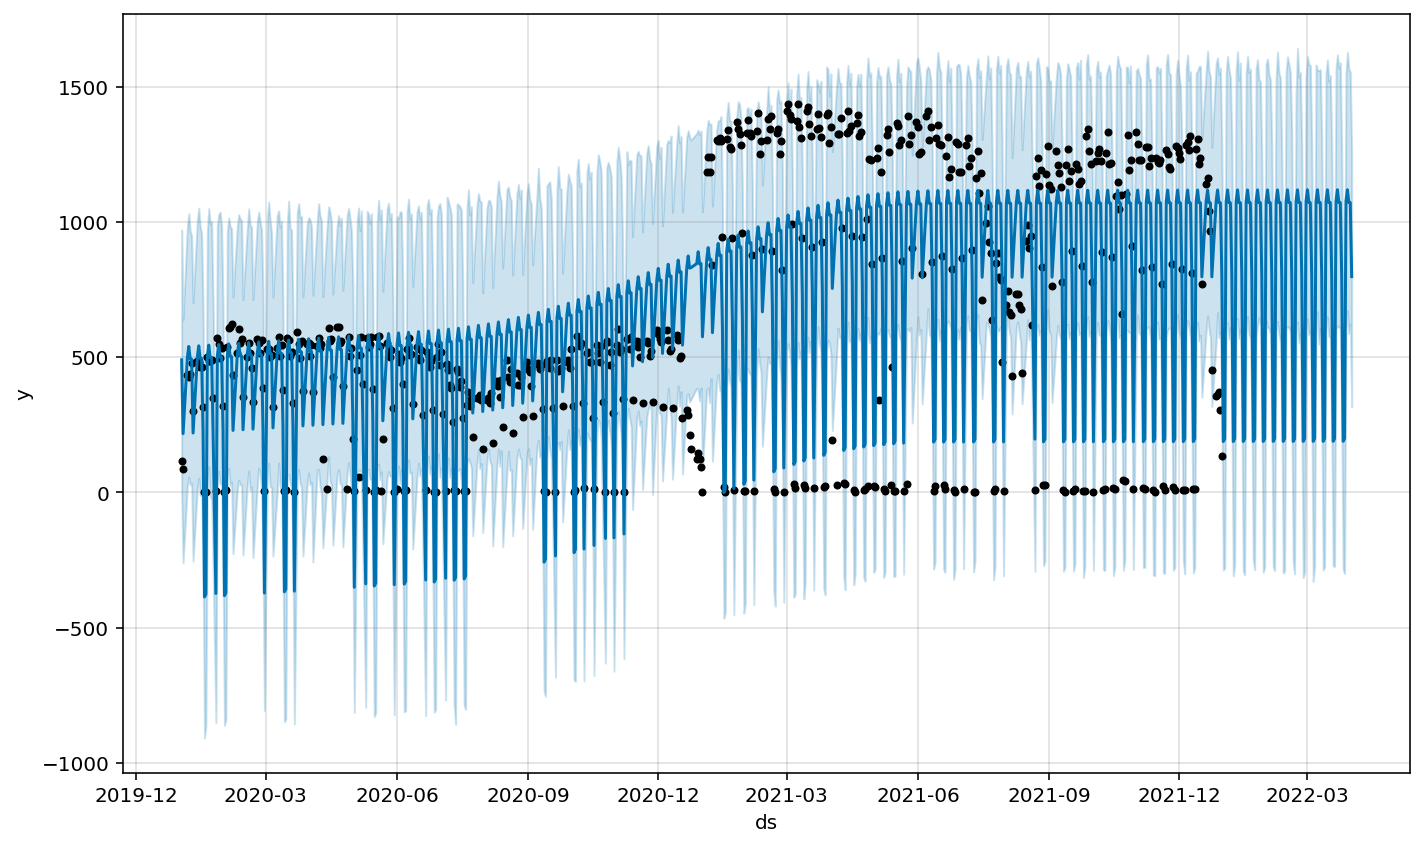

In [72]:
contractmanagement = cm.plot(forecastcm)

In [73]:
df2.plot.line(x = 'ds', y = 'yhat')

NameError: name 'df2' is not defined

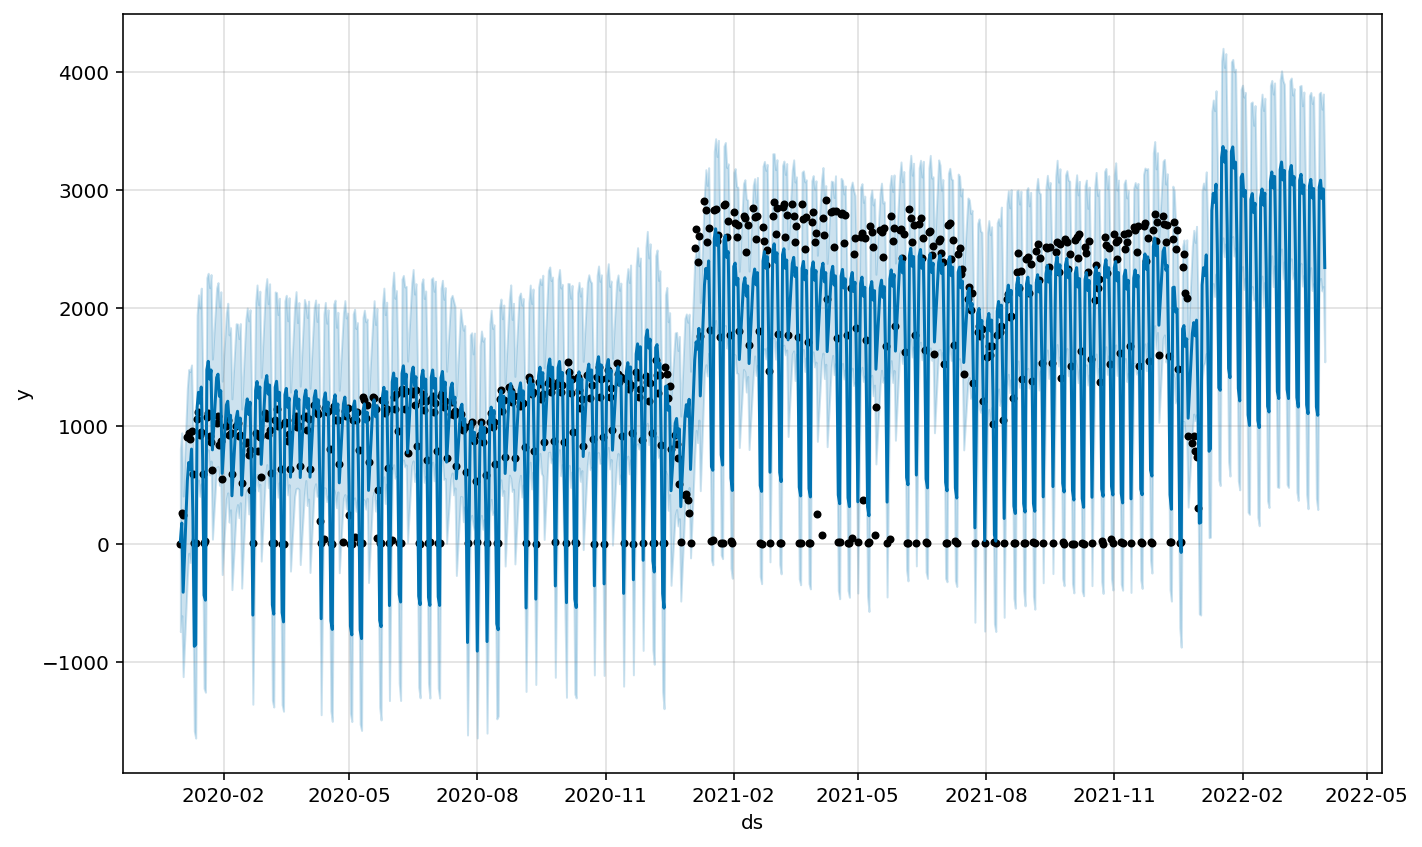

In [74]:
technischmanagement = tm.plot(forecasttm)

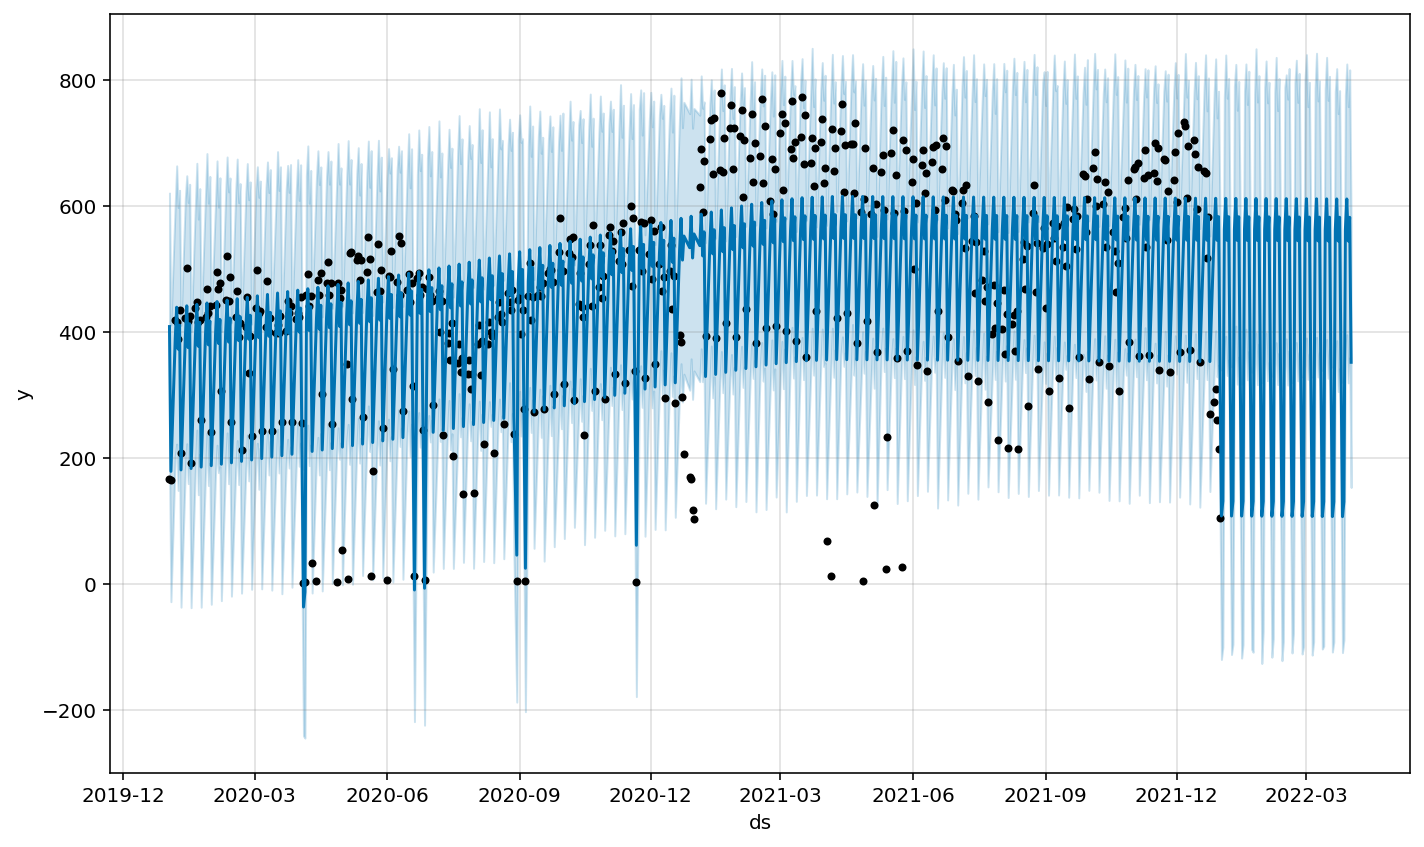

In [75]:
omgevingsmanagement = om.plot(forecastom)

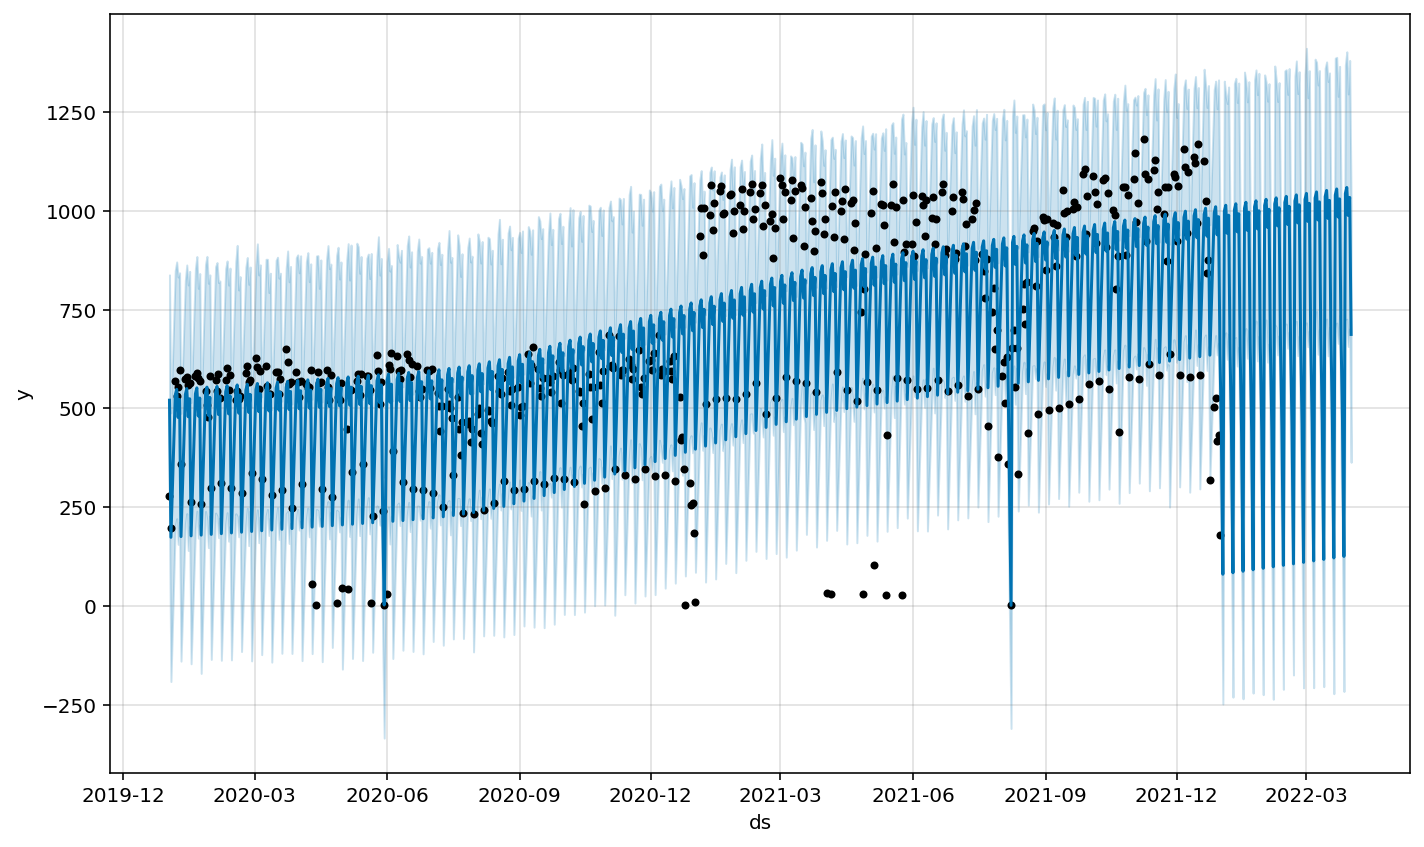

In [76]:
projectbeheersing = pb.plot(forecastpb)

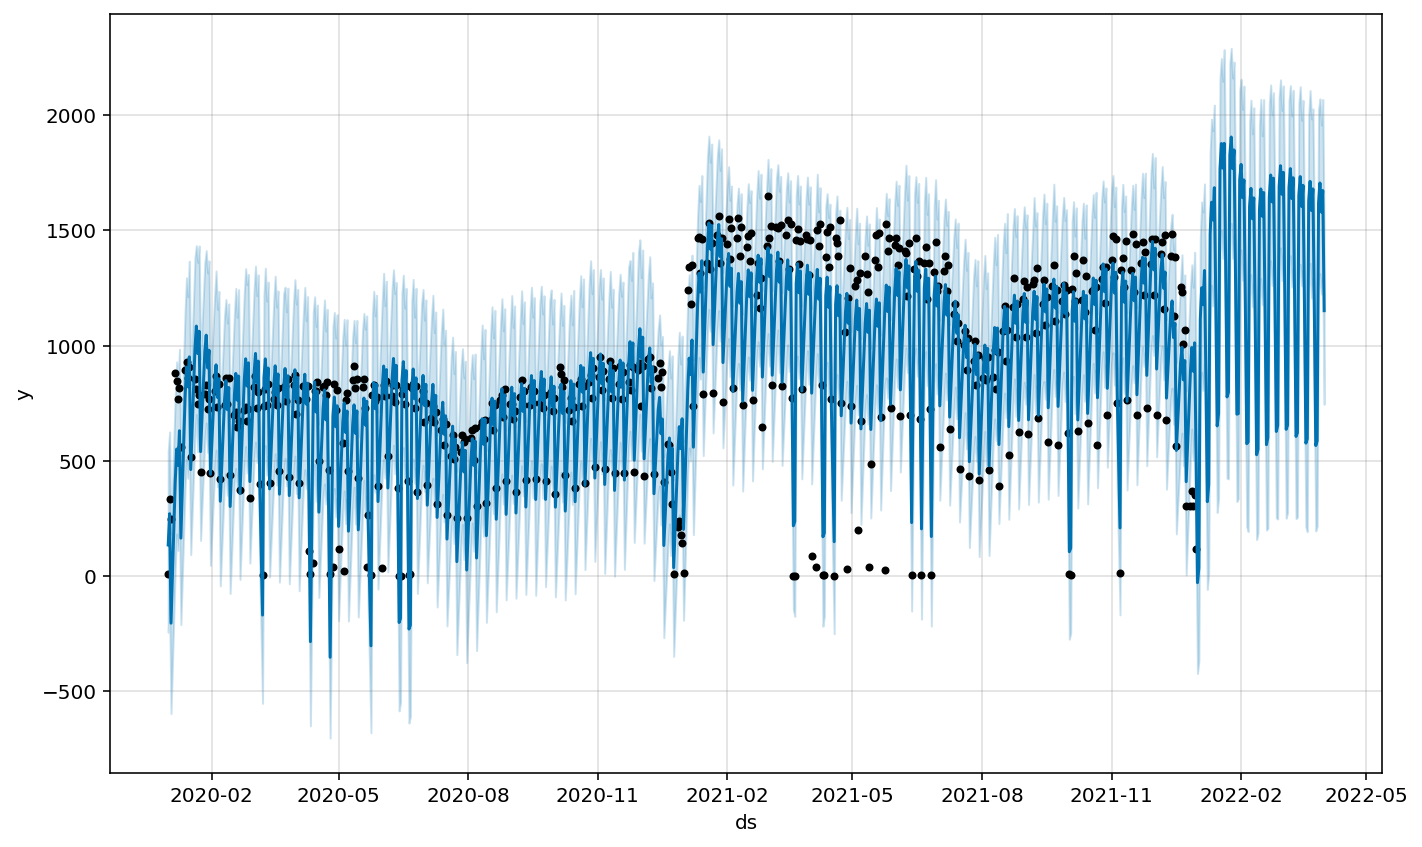

In [77]:
integraalprojectmanager = ip.plot(forecastip)

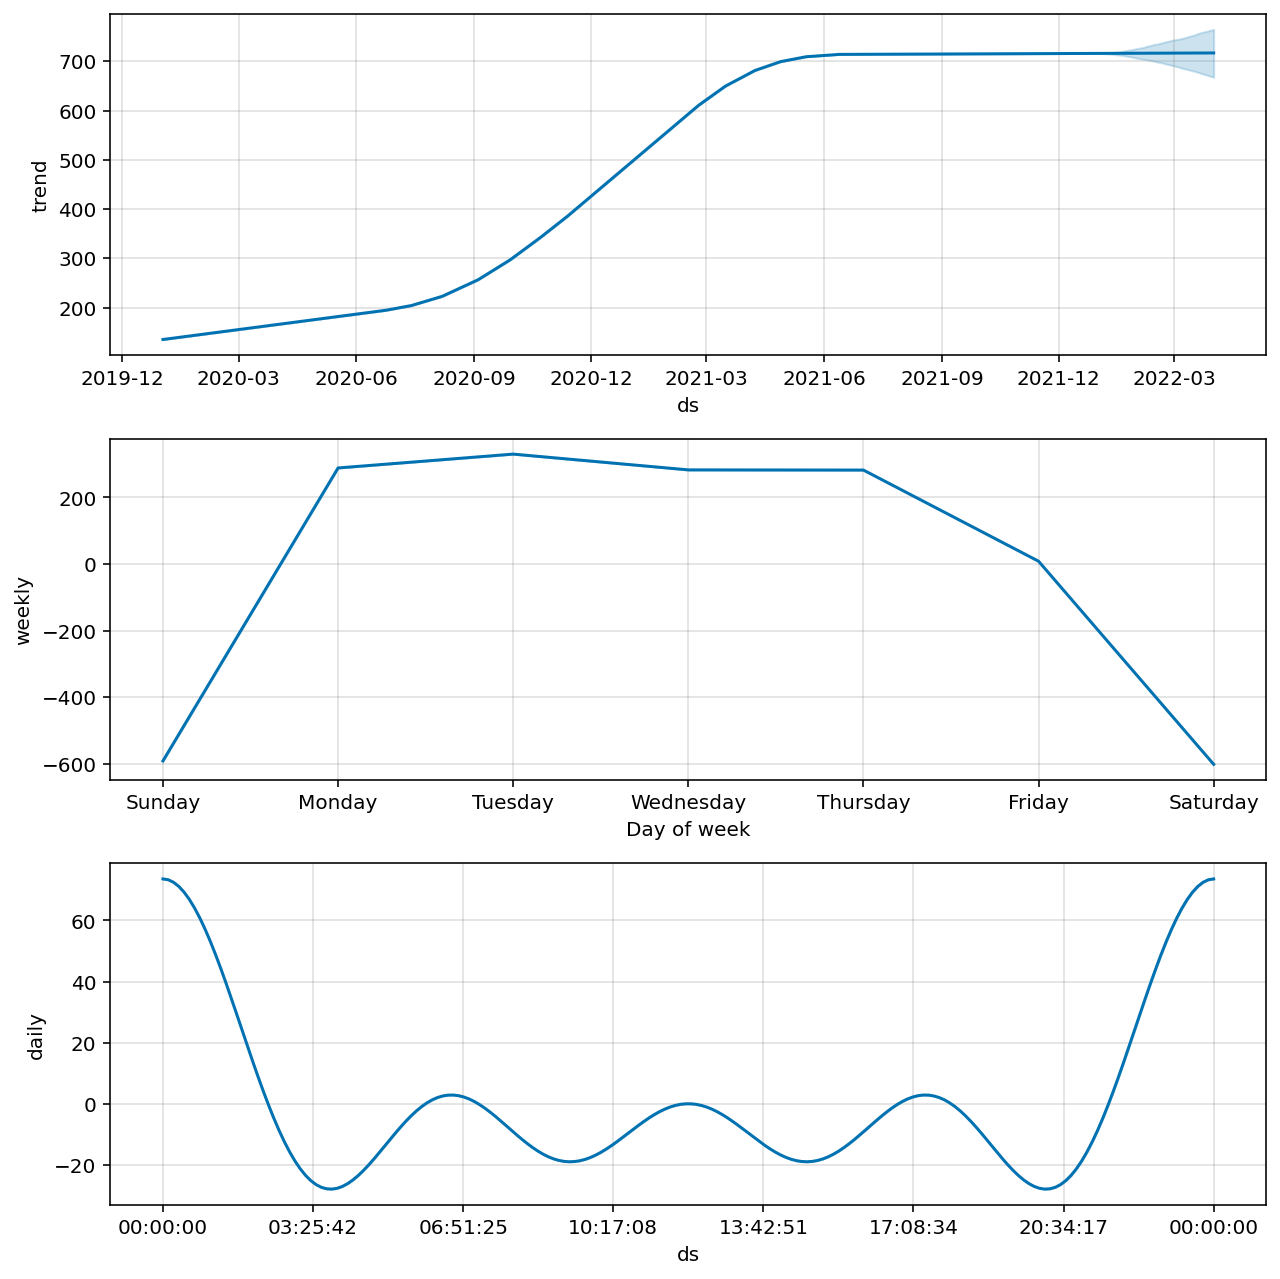

In [78]:
plcm = cm.plot_components(forecastcm)

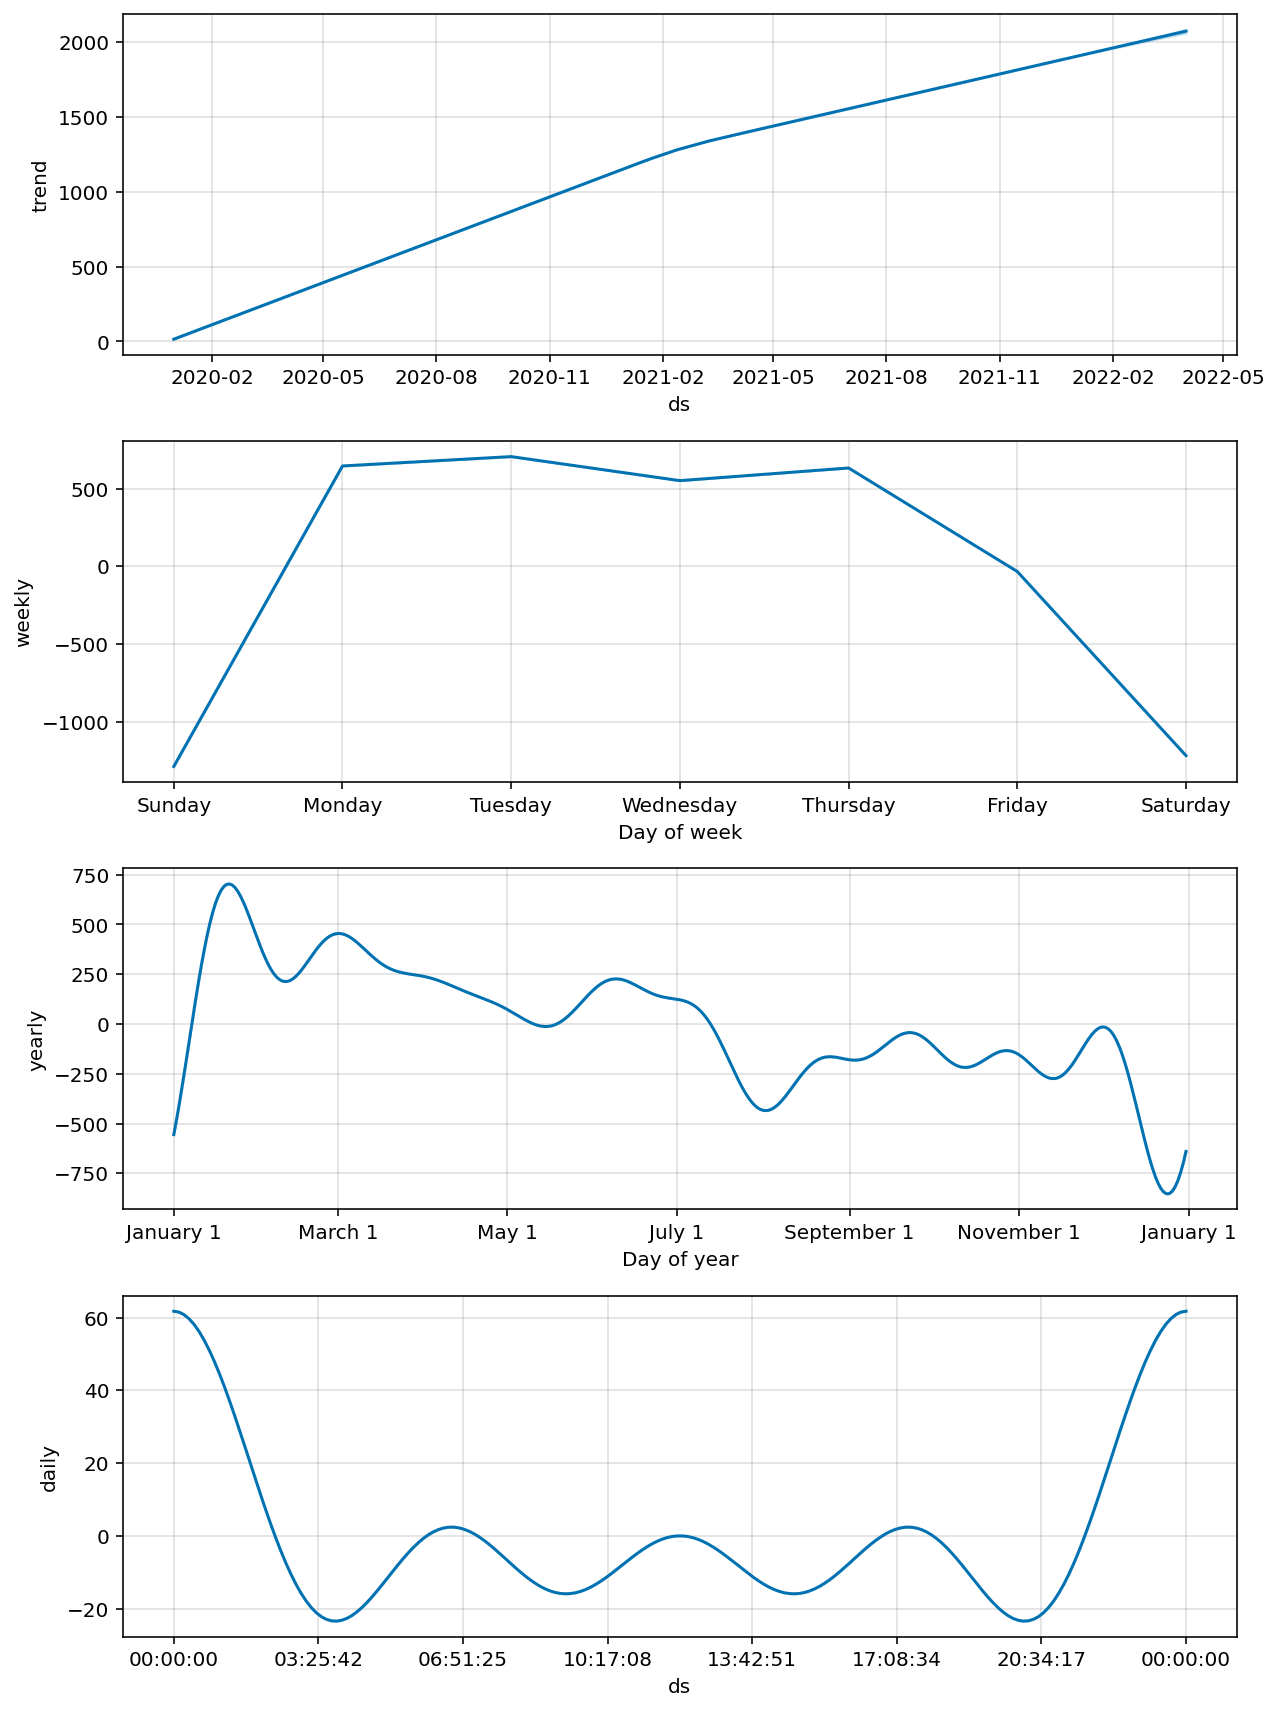

In [79]:
pltm = tm.plot_components(forecasttm)

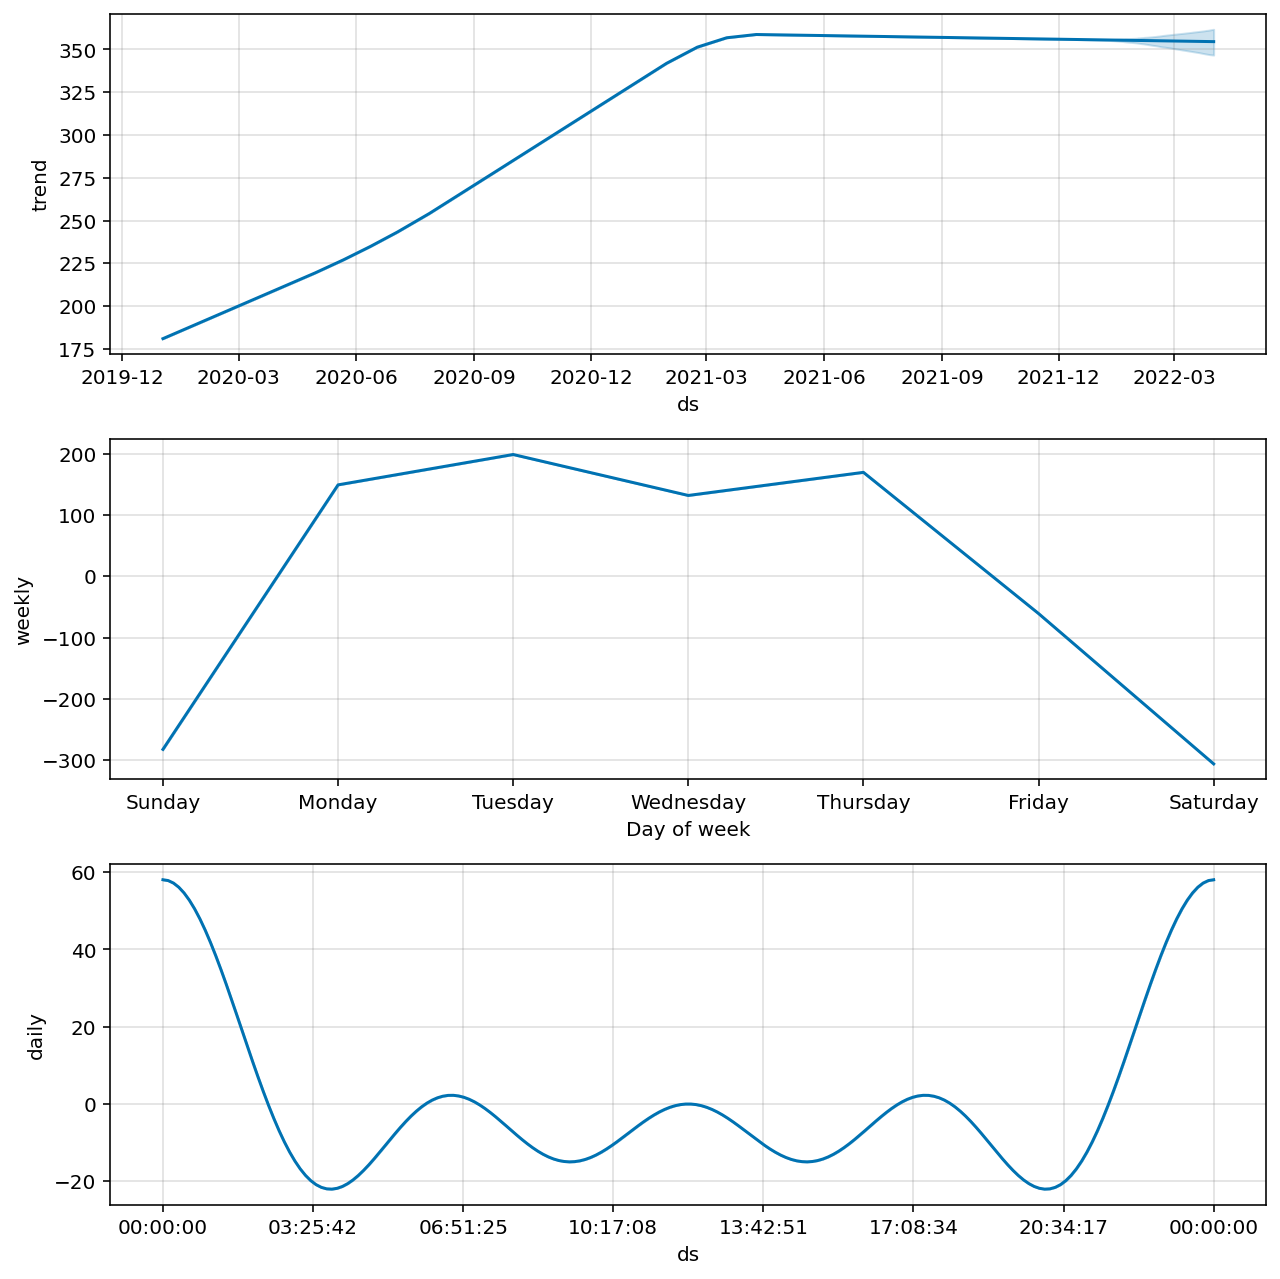

In [80]:
plom = om.plot_components(forecastom)

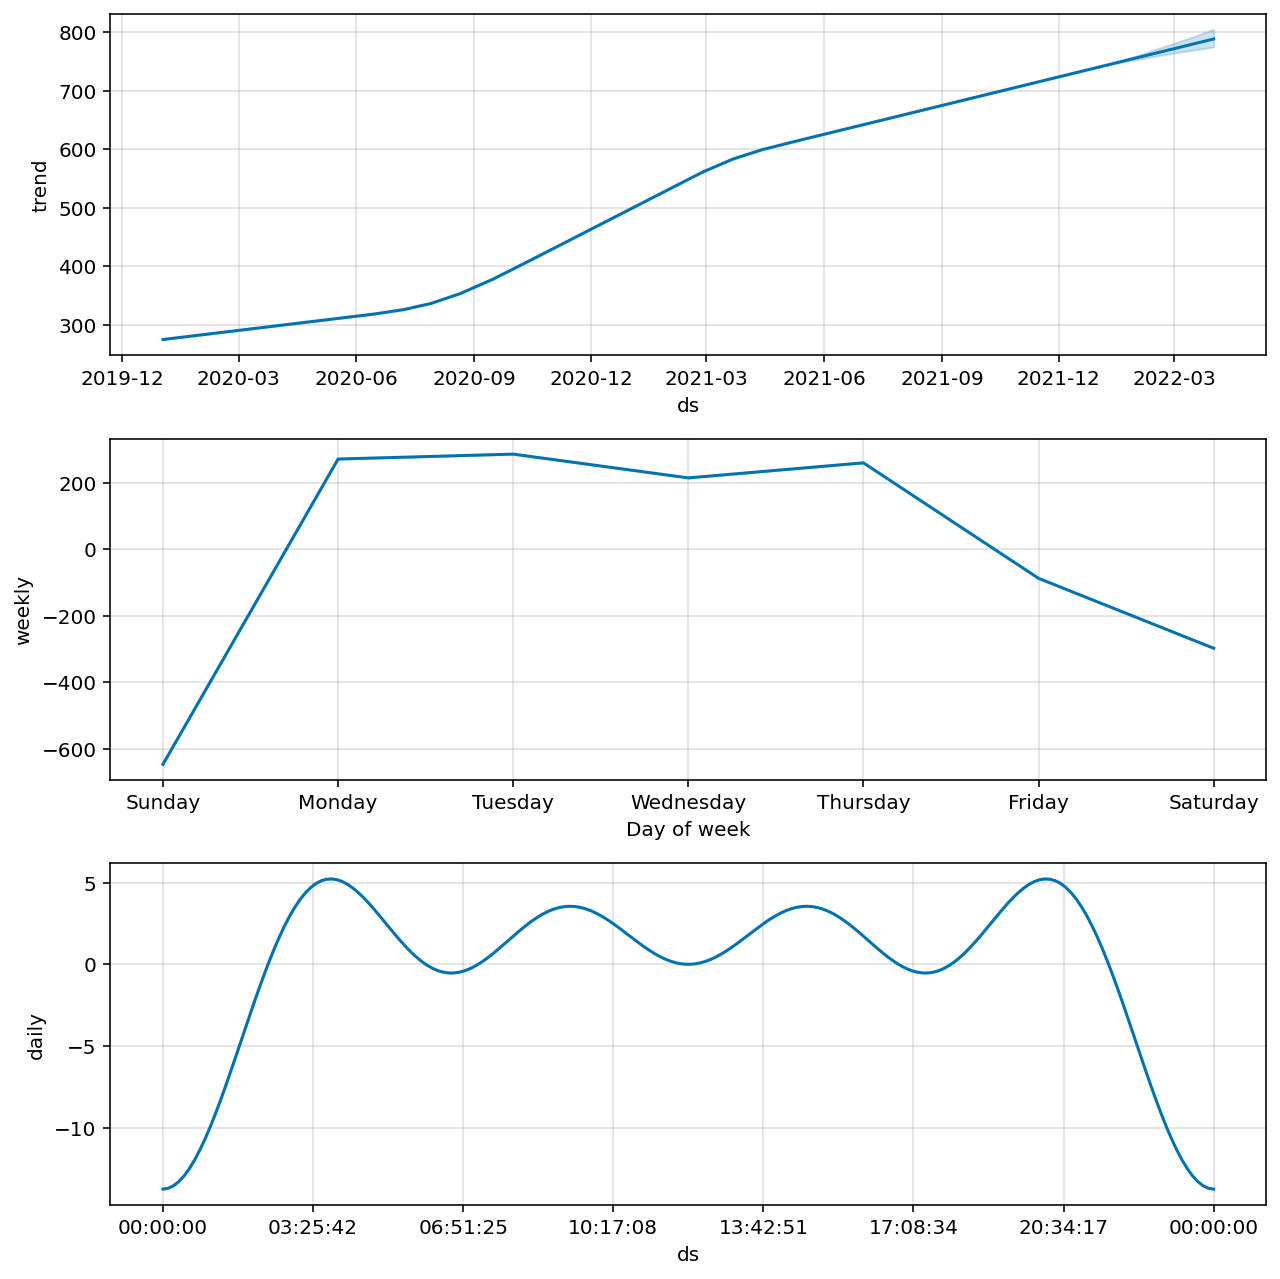

In [81]:
plpb = pb.plot_components(forecastpb)

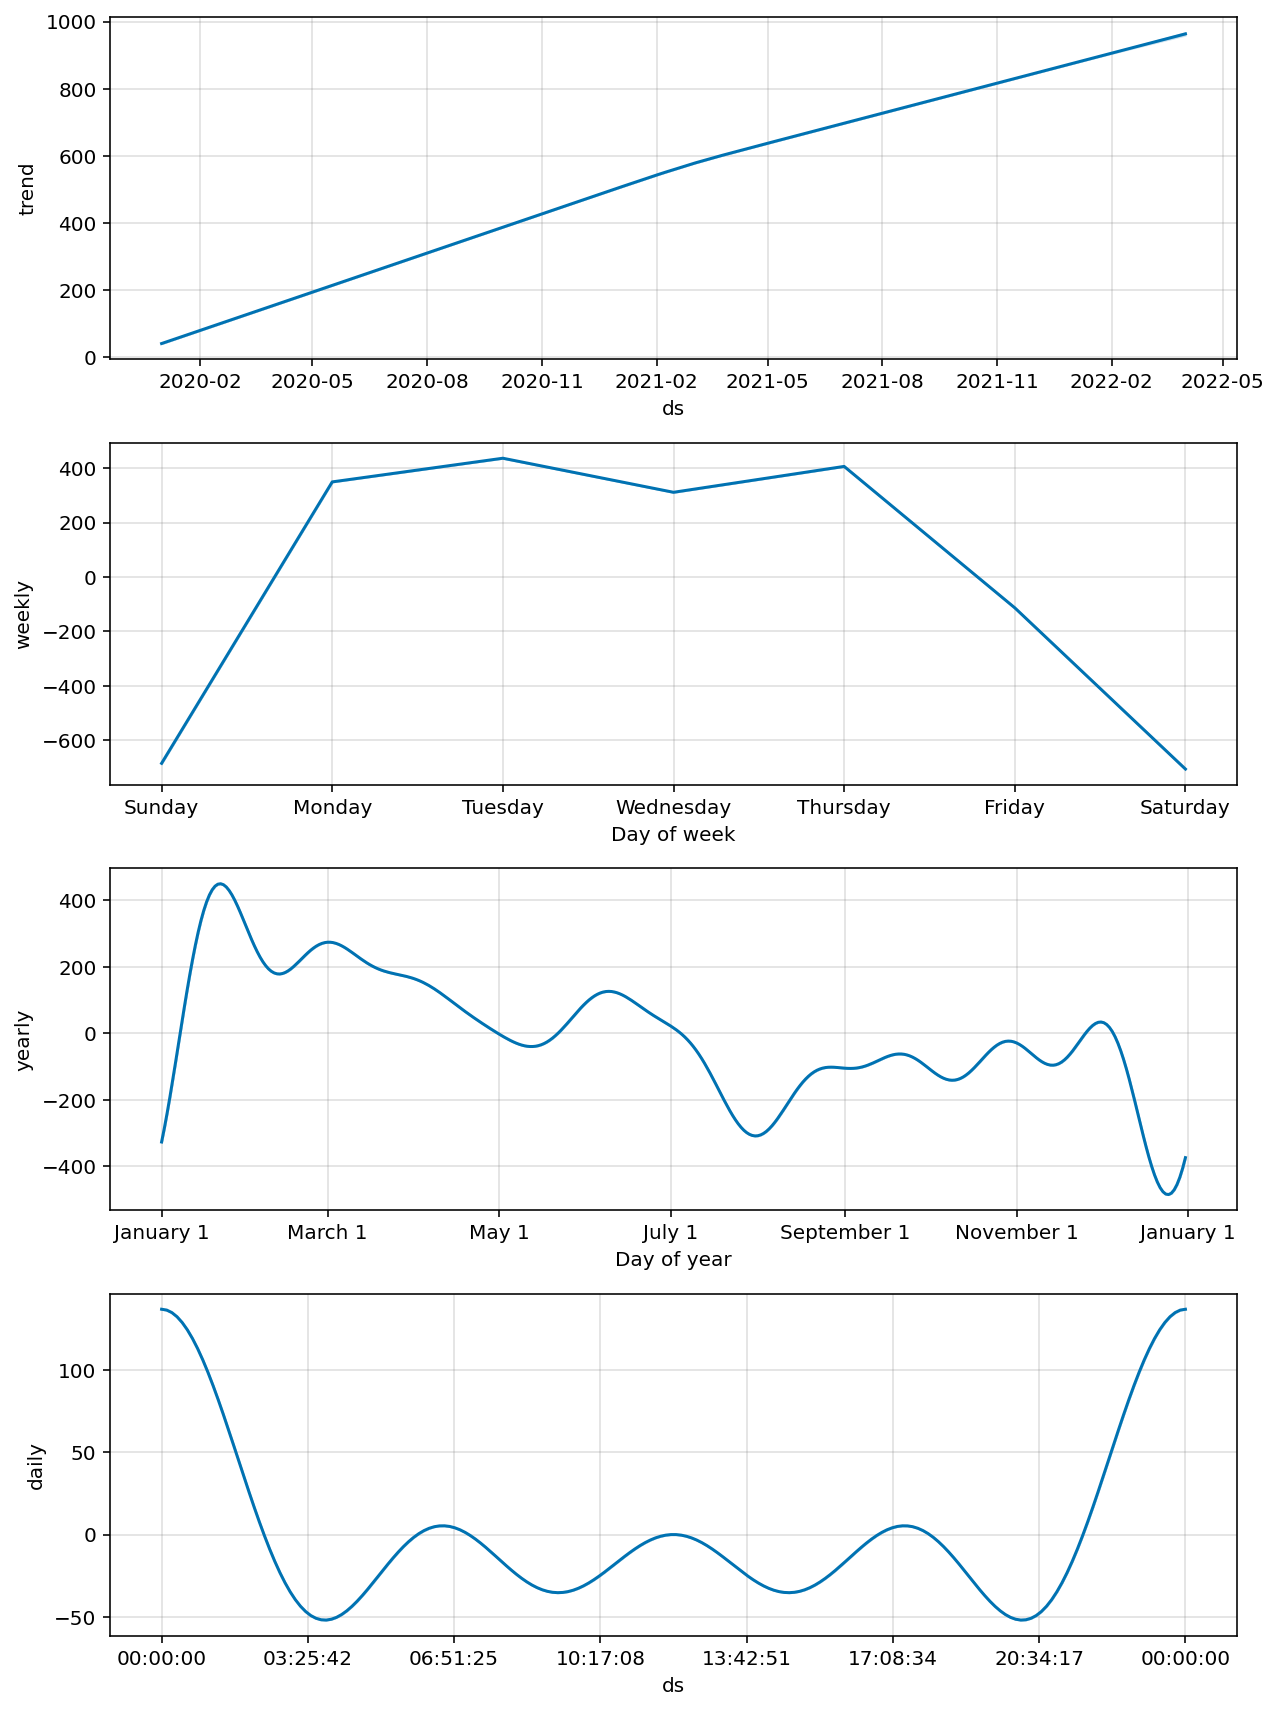

In [82]:
plip = ip.plot_components(forecastip)

## 5 Cross Validation

In [83]:
CM = cross_validation(cm,initial='38 days', period='45 days', horizon = '91 days')


INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-02-24 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [84]:
OM = cross_validation(om,initial='38 days', period='45 days', horizon = '91 days')

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-02-24 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [85]:
PB = cross_validation(pb,initial='38 days', period='45 days', horizon = '91 days')

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-02-24 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [86]:
IP = cross_validation(ip,initial='38 days', period='45 days', horizon = '91 days')

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-02-24 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [87]:
TM = cross_validation(tm,initial='38 days', period='45 days', horizon = '91 days')

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-02-24 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [88]:
TM.head()

ds         yhat   yhat_lower   yhat_upper        y     cutoff
0 2020-02-25  1075.048580  1007.574655  1141.722941   927.30 2020-02-24
1 2020-02-26   983.877352   921.207966  1049.110245   785.85 2020-02-24
2 2020-02-27  1061.679449   992.954248  1123.431628   906.55 2020-02-24
3 2020-02-28   793.798286   730.154695   850.934295   570.85 2020-02-24
4 2020-03-02  1286.667063  1217.254779  1352.074016  1111.70 2020-02-24

In [89]:
CM.head()

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0 2020-02-25  630.068118  498.144294  757.872122  552.40 2020-02-24
1 2020-02-26  609.862526  491.296499  735.375966  516.95 2020-02-24
2 2020-02-27  578.176818  454.956037  697.250292  565.10 2020-02-24
3 2020-02-28  424.183072  302.367270  550.143046  387.65 2020-02-24
4 2020-02-29  127.062928   -4.069309  254.392233    6.00 2020-02-24

In [90]:
OM.head()

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0 2020-02-25  515.036902  425.867954  601.916866  454.95 2020-02-24
1 2020-02-26  464.448111  374.789402  551.917685  335.20 2020-02-24
2 2020-02-27  455.334493  367.763335  541.070362  393.95 2020-02-24
3 2020-02-28  276.750743  189.297830  371.009554  234.20 2020-02-24
4 2020-03-02  475.255544  382.734152  565.616497  438.75 2020-02-24

In [91]:
IP.head()

ds         yhat   yhat_lower   yhat_upper       y     cutoff
0 2020-02-25   785.800062   719.780995   853.781131  733.35 2020-02-24
1 2020-02-26   732.498976   665.215612   799.767125  672.65 2020-02-24
2 2020-02-27   849.596162   780.956574   911.132932  724.00 2020-02-24
3 2020-02-28   571.714024   508.378407   634.947129  338.70 2020-02-24
4 2020-03-02  1093.309895  1025.566176  1161.701135  819.60 2020-02-24

In [92]:
PB.head()

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0 2020-02-25  577.675441  481.637726  685.386066  607.75 2020-02-24
1 2020-02-26  566.809908  459.056780  681.184437  566.45 2020-02-24
2 2020-02-27  552.838611  443.913402  661.859514  573.00 2020-02-24
3 2020-02-28  307.023286  205.692167  410.316301  335.20 2020-02-24
4 2020-03-02  588.711464  489.786369  696.947141  626.45 2020-02-24

# Performance Metrics

In [93]:
df_tm = performance_metrics(TM)
df_cm = performance_metrics(CM)
df_om = performance_metrics(OM)
df_ip = performance_metrics(IP)
df_pb = performance_metrics(PB)

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


In [94]:
df_tm.describe()

horizon           mse          rmse          mae  \
count                          82  8.200000e+01     82.000000    82.000000   
mean             50 days 12:00:00  4.045454e+07   5844.951492  2482.263790   
std    23 days 19:33:58.568845364  2.797478e+07   2523.637592   887.034125   
min              10 days 00:00:00  6.331008e+05    795.676340   570.982073   
25%              30 days 06:00:00  1.574940e+07   3968.549587  1833.638706   
50%              50 days 12:00:00  3.848141e+07   6203.326168  2614.394038   
75%              70 days 18:00:00  5.443093e+07   7377.732082  3112.501325   
max              91 days 00:00:00  1.006225e+08  10031.075571  3950.442355   

             mape      mdape   coverage  
count   82.000000  82.000000  82.000000  
mean    93.656020   0.532564   0.503592  
std     55.020740   0.112490   0.056248  
min     18.306503   0.324764   0.396396  
25%     52.481334   0.468457   0.467949  
50%     89.685519   0.510948   0.494267  
75%    115.661540   0.577004   0.541753  
max    244.668710   0.832487   0.624625

In [95]:
df_cm.describe()

horizon            mse        rmse         mae  \
count                          82      82.000000   82.000000   82.000000   
mean             50 days 12:00:00  153554.330746  385.572211  266.624359   
std    23 days 19:33:58.568845364   54833.464329   70.347365   65.783778   
min              10 days 00:00:00   67724.837730  260.239962  161.051570   
25%              30 days 06:00:00  115261.934020  339.502471  221.324449   
50%              50 days 12:00:00  145889.881445  381.954935  260.907881   
75%              70 days 18:00:00  200991.898022  448.283440  322.935069   
max              91 days 00:00:00  275582.018316  524.959063  408.385253   

           mdape   coverage  
count  82.000000  82.000000  
mean    0.300749   0.705883  
std     0.126936   0.101504  
min     0.118804   0.444601  
25%     0.217201   0.651041  
50%     0.258939   0.720511  
75%     0.393137   0.761086  
max     0.572933   0.871560

In [96]:
df_om.describe()

horizon           mse        rmse         mae  \
count                          83     83.000000   83.000000   83.000000   
mean             50 days 00:00:00  20817.478338  142.229284  102.252609   
std    24 days 02:29:40.553063914   6846.521119   24.402535   18.040488   
min               9 days 00:00:00   8143.577591   90.241773   64.500369   
25%              29 days 12:00:00  16627.238164  128.946564   92.100521   
50%              50 days 00:00:00  19125.208953  138.293922  102.825487   
75%              70 days 12:00:00  25640.164920  160.125435  115.327849   
max              91 days 00:00:00  36683.262545  191.528751  140.317813   

            mape      mdape   coverage  
count  83.000000  83.000000  83.000000  
mean    2.798734   0.156939   0.829256  
std     2.230010   0.029448   0.070080  
min     0.149747   0.087046   0.680220  
25%     1.013695   0.138743   0.779720  
50%     2.658947   0.166752   0.821978  
75%     3.334491   0.178900   0.877123  
max     8.498324   0.199579   0.956044

In [97]:
df_ip.describe()

horizon           mse         rmse          mae  \
count                          83  8.300000e+01    83.000000    83.000000   
mean             50 days 00:00:00  1.479578e+07  3605.583627  1455.906273   
std    24 days 02:29:40.553063914  8.628267e+06  1348.125238   504.234740   
min               9 days 00:00:00  1.888672e+05   434.588529   306.669614   
25%              29 days 12:00:00  7.833756e+06  2798.880286  1147.267240   
50%              50 days 00:00:00  1.490934e+07  3861.261526  1541.418357   
75%              70 days 12:00:00  2.027698e+07  4502.995773  1753.823911   
max              91 days 00:00:00  3.162779e+07  5623.859415  2337.489129   

           mdape   coverage  
count  83.000000  83.000000  
mean    0.317065   0.549315  
std     0.066267   0.067679  
min     0.185635   0.404255  
25%     0.261101   0.499516  
50%     0.313591   0.570213  
75%     0.383677   0.607350  
max     0.438383   0.640426

In [98]:
df_ip.describe()

horizon           mse         rmse          mae  \
count                          83  8.300000e+01    83.000000    83.000000   
mean             50 days 00:00:00  1.479578e+07  3605.583627  1455.906273   
std    24 days 02:29:40.553063914  8.628267e+06  1348.125238   504.234740   
min               9 days 00:00:00  1.888672e+05   434.588529   306.669614   
25%              29 days 12:00:00  7.833756e+06  2798.880286  1147.267240   
50%              50 days 00:00:00  1.490934e+07  3861.261526  1541.418357   
75%              70 days 12:00:00  2.027698e+07  4502.995773  1753.823911   
max              91 days 00:00:00  3.162779e+07  5623.859415  2337.489129   

           mdape   coverage  
count  83.000000  83.000000  
mean    0.317065   0.549315  
std     0.066267   0.067679  
min     0.185635   0.404255  
25%     0.261101   0.499516  
50%     0.313591   0.570213  
75%     0.383677   0.607350  
max     0.438383   0.640426

In [99]:
df_pb.describe()

horizon           mse        rmse         mae  \
count                          83     83.000000   83.000000   83.000000   
mean             50 days 00:00:00  56124.357902  233.168284  156.883339   
std    24 days 02:29:40.553063914  19251.995527   42.170308   37.411625   
min               9 days 00:00:00  21441.682310  146.429786   89.272089   
25%              29 days 12:00:00  43240.313618  207.942898  132.314113   
50%              50 days 00:00:00  56546.592905  237.795275  155.397539   
75%              70 days 12:00:00  69161.365620  262.985420  182.807919   
max              91 days 00:00:00  96520.556555  310.677577  245.606751   

            mape      mdape   coverage  
count  83.000000  83.000000  83.000000  
mean    3.326998   0.136352   0.779595  
std     2.755278   0.040814   0.091915  
min     0.148950   0.065037   0.524176  
25%     0.935537   0.106852   0.728022  
50%     1.988903   0.129499   0.789011  
75%     6.034229   0.162165   0.839560  
max     8.856436   0.271461   0.932967

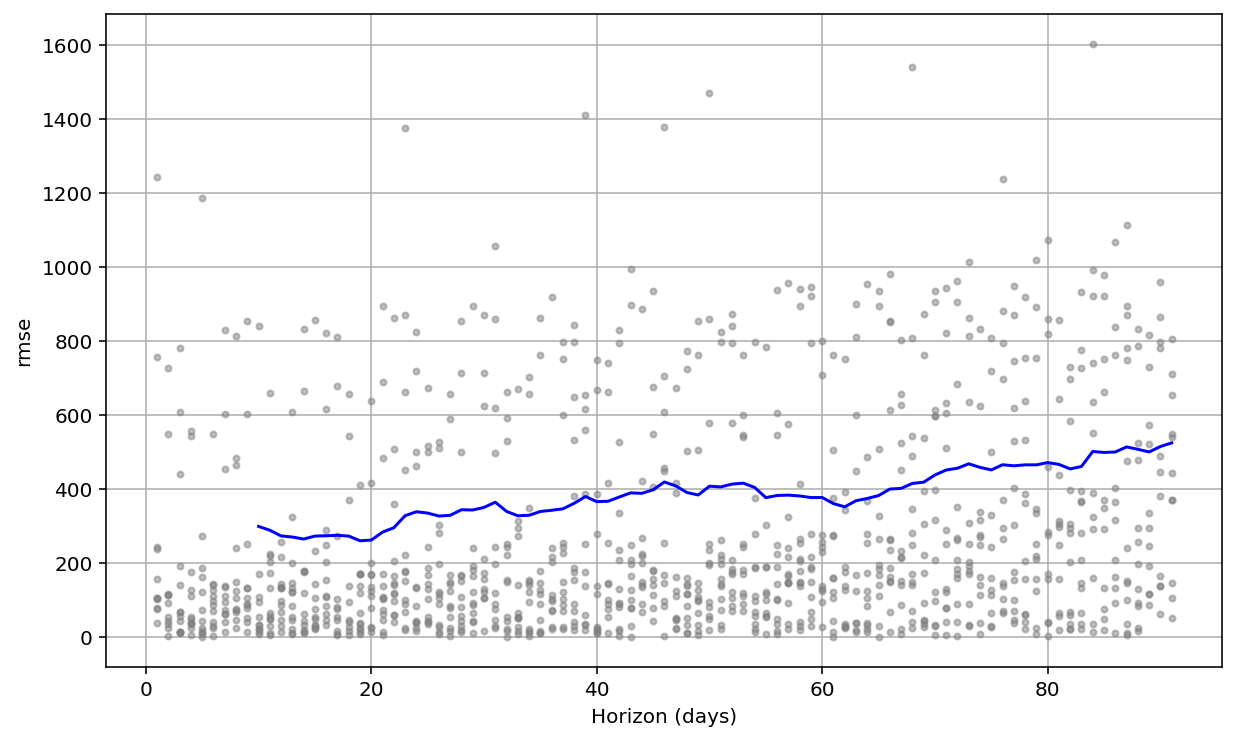

In [100]:
figCM = plot_cross_validation_metric(CM, metric='rmse')

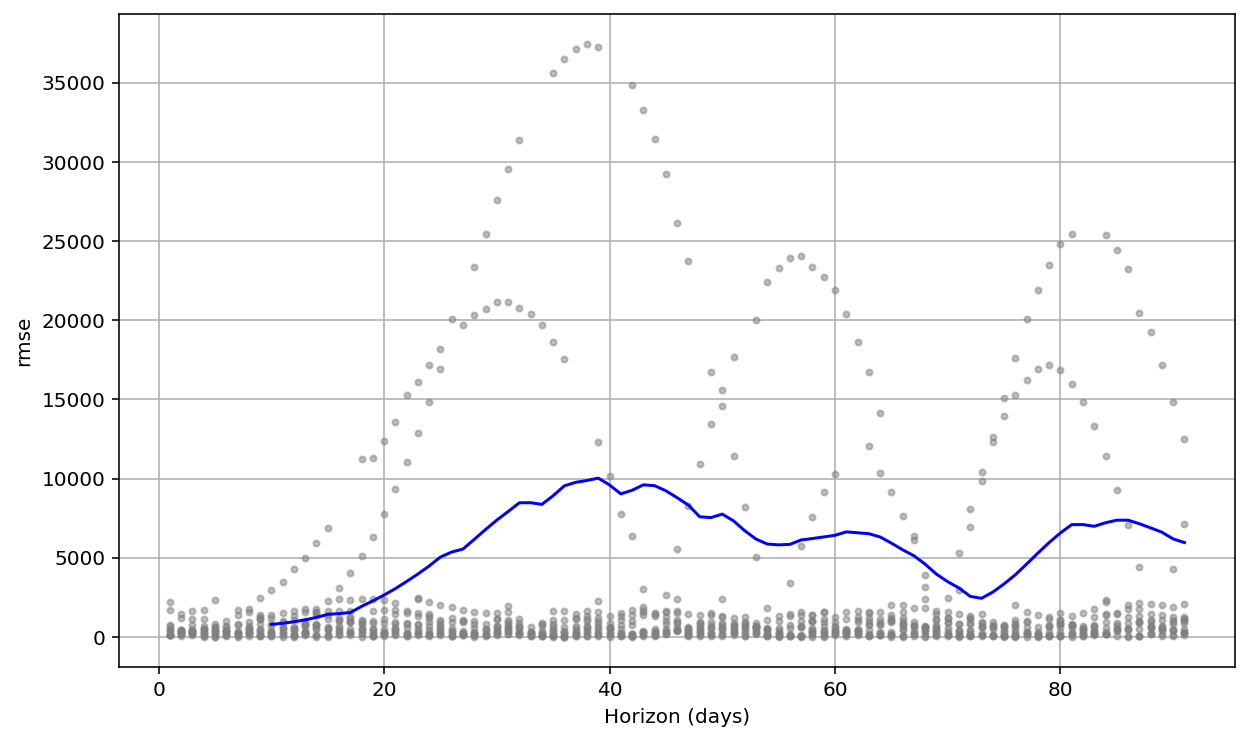

In [101]:
figTM = plot_cross_validation_metric(TM, metric='rmse')

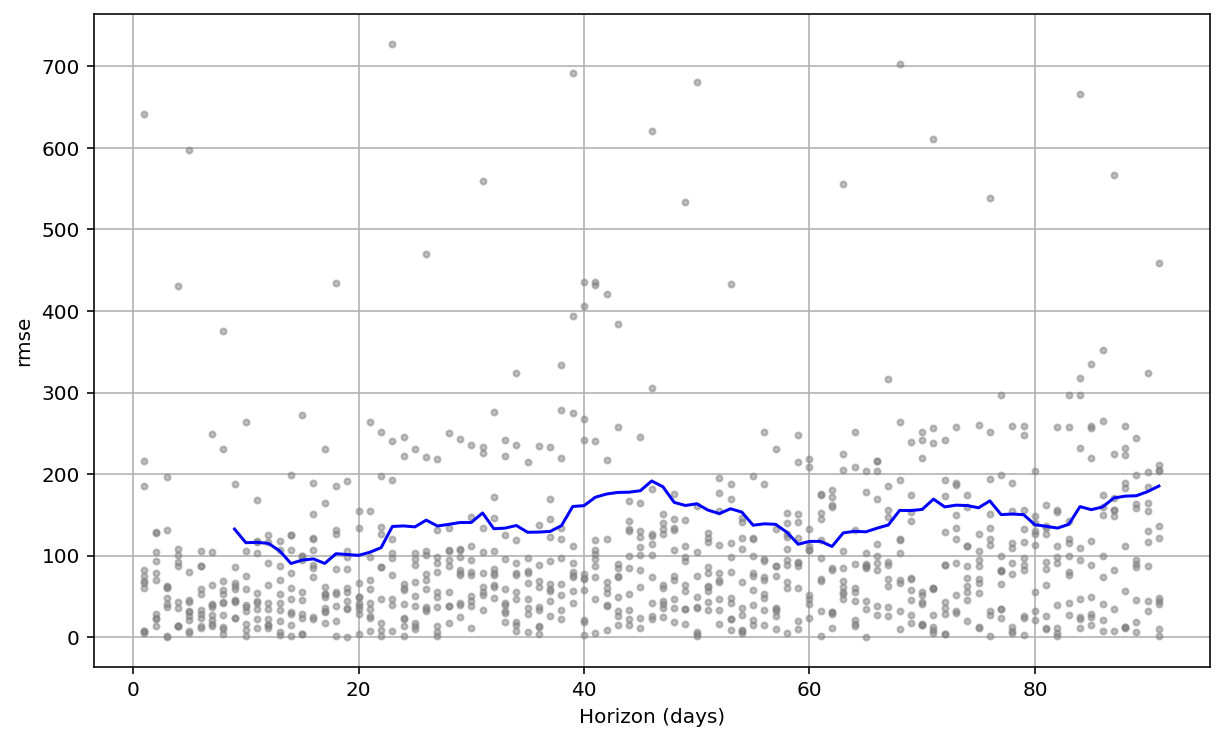

In [102]:
figOM= plot_cross_validation_metric(OM, metric='rmse')

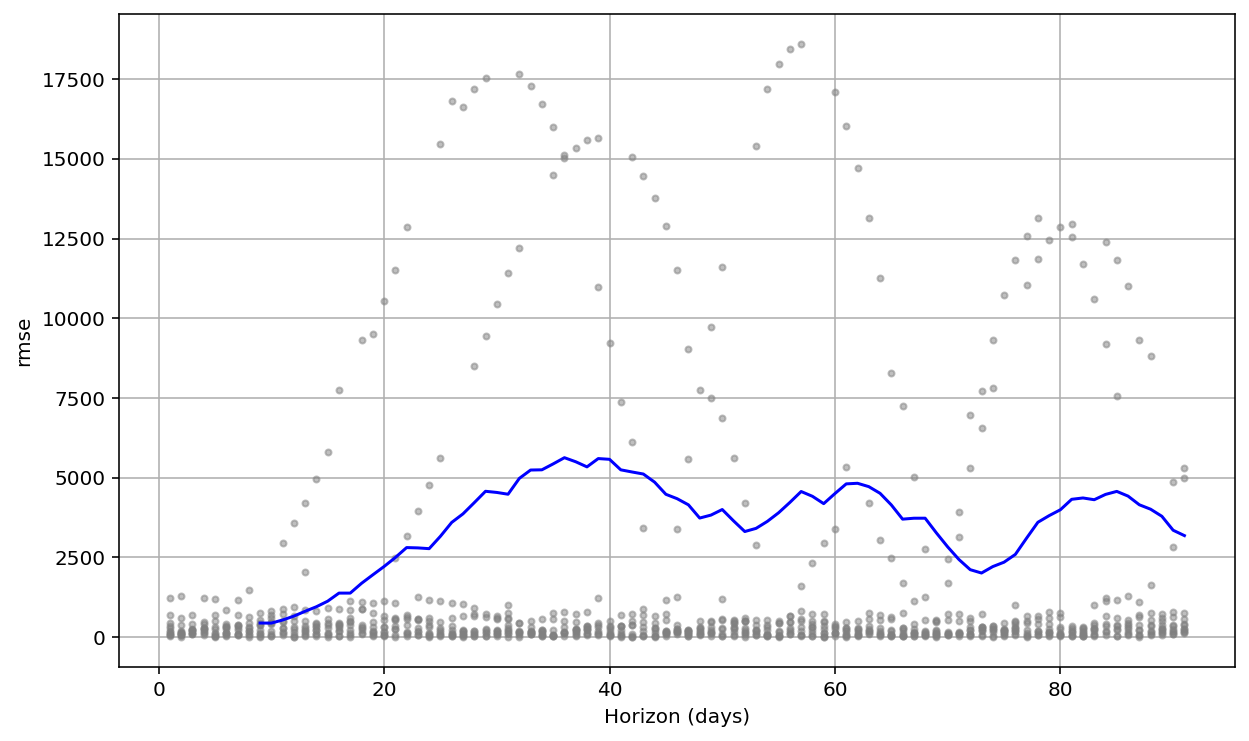

In [103]:
figIP = plot_cross_validation_metric(IP, metric='rmse')

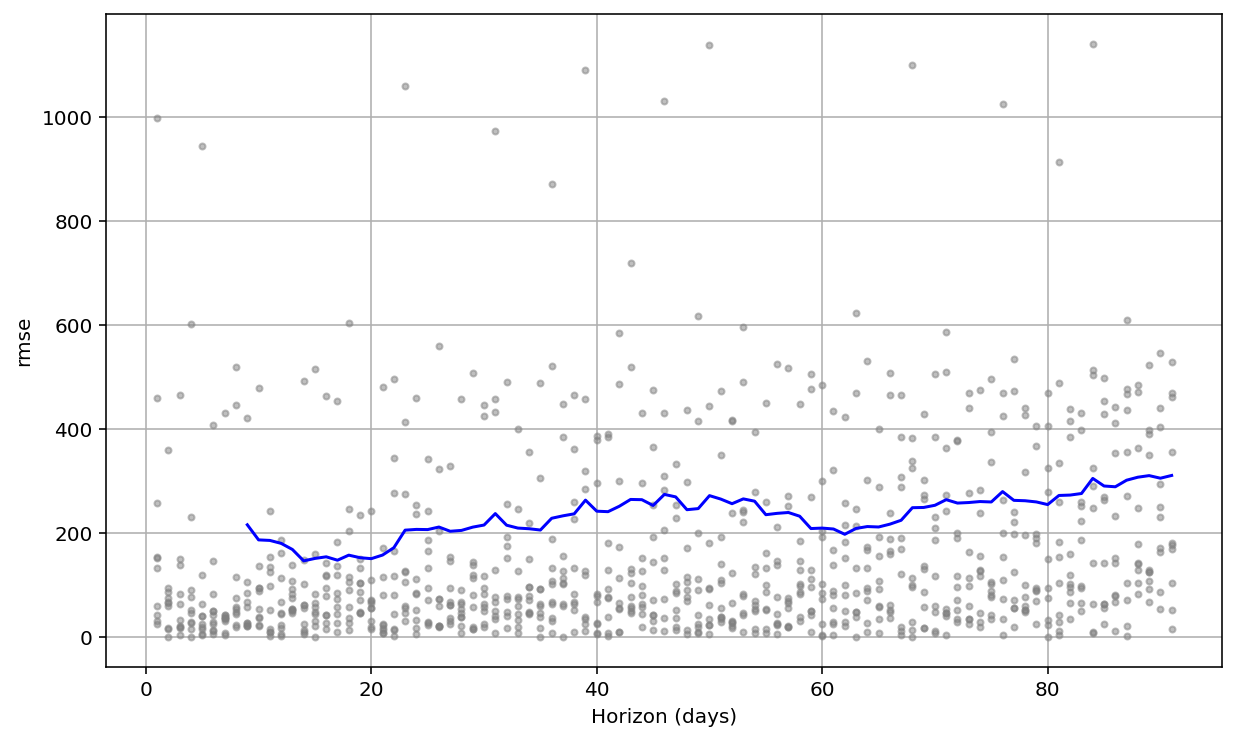

In [104]:
figPB = plot_cross_validation_metric(PB, metric='rmse')

In [105]:
forecasttm.to_excel(r'/Users/genivabraaf/Downloads/Mac\TM.xlsx', index = False)

## Model 2

In [106]:
year2021 = pd.read_excel('2021.xlsx')
year2021.head()

Opdrachtgever         Categorie     Project  \
0  Verkeer en Openbare Ruimte  Productieve uren  2980002367   
1  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
2  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
3  Verkeer en Openbare Ruimte  Productieve uren  2980001854   
4  Verkeer en Openbare Ruimte  Productieve uren  2980000749   

                           Projectnaam  Werkorder              Werkordernaam  \
0  DNK Touringcarterminal Duivendrecht      33531     DNK Touringcarterminal   
1         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
2         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
3         OMOP Wegen SD zuid 2019/2020      34009     Kromme Mijdrechtstraat   
4            Jan de Louter en omgeving      22715  Jan de Louter en omgeving   

                     Fase_Rol  PBI  Asn (aangepast)   Fte Contract  \
0  .IPM - Omgevingsmanagement  0.0           283072  0.89     Vast   
1   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
2   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
3   .IPM - Contractmanagement  NaN           801088  1.00     Vast   
4    .IPM - Projectbeheersing  1.0           875136  1.00     Vast   

                 Werktitel                           Organisatie  Jaar  Maand  \
0  Assistent projectleider                               PM Oost  2021      1   
1           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
2           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
3           Toezichthouder  Realisatie Noord, Zuid en Nieuw West  2021      1   
4                 Adviseur                     Projectbeheersing  2021      1   

   Week      Datum  Uren  Tarief  
0     1 2021-01-04   2.0    93.3  
1     1 2021-01-04   4.0    87.3  
2     1 2021-01-05   4.0    87.3  
3     1 2021-01-06   4.0    87.3  
4     1 2021-01-05   0.5   105.3

In [107]:
year2021.isna().sum()

Opdrachtgever           0
Categorie               0
Project                 0
Projectnaam             0
Werkorder               0
Werkordernaam           0
Fase_Rol                0
PBI                404114
Asn (aangepast)         0
Fte                    79
Contract                0
Werktitel               0
Organisatie             0
Jaar                    0
Maand                   0
Week                    0
Datum                   0
Uren                  254
Tarief                  5
dtype: int64

In [108]:
year2021['PBI'] = year2021['PBI'].replace(np.nan,0)
year2021['Fte'] = year2021['Fte'].replace(np.nan,0)
year2021['Uren'] = year2021['Uren'].replace(np.nan,0)
year2021['Tarief'] = year2021['Tarief'].replace(np.nan,0)

In [109]:
year2021.isna().sum()

Opdrachtgever      0
Categorie          0
Project            0
Projectnaam        0
Werkorder          0
Werkordernaam      0
Fase_Rol           0
PBI                0
Asn (aangepast)    0
Fte                0
Contract           0
Werktitel          0
Organisatie        0
Jaar               0
Maand              0
Week               0
Datum              0
Uren               0
Tarief             0
dtype: int64

In [110]:
data = year2021.groupby(['Datum', 'Fase_Rol']).agg({'Uren':sum,}).reset_index()
data.head(5)

Datum                            Fase_Rol  Uren
0 2021-01-01           .IPM - Contractmanagement   0.0
1 2021-01-01  .IPM - Integraal Projectmanagement  11.2
2 2021-01-01            .IPM - Projectbeheersing   9.0
3 2021-01-01         .IPM - Technisch management   8.0
4 2021-01-01                 Indirect productief  11.2

In [111]:
role = ['.IPM - Technisch management'] 
technischmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [112]:
role = ['.IPM - Contractmanagement'] 
contractmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [113]:
role = ['.IPM - Integraal Projectmanagement'] 
integraalprojectmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [114]:
role = ['.IPM - Omgevingsmanagement'] 
omgevingsmanagement = data.loc[data['Fase_Rol'].isin(role)] 

In [115]:
role = ['.IPM - Projectbeheersing'] 
projectbeheersing  = data.loc[data['Fase_Rol'].isin(role)] 

In [116]:
data['Fase_Rol'].value_counts()

.IPM - Contractmanagement             331
.IPM - Technisch management           328
.IPM - Integraal Projectmanagement    272
Indirect productief                   267
.IPM - Projectbeheersing              262
.IPM - Omgevingsmanagement            260
Detachering                           243
Name: Fase_Rol, dtype: int64

In [117]:
technischmanagement.shape

(328, 3)

In [118]:
contractmanagement.shape

(331, 3)

In [119]:
integraalprojectmanagement.shape

(272, 3)

In [120]:
omgevingsmanagement.shape

(260, 3)

In [121]:
projectbeheersing.shape

(262, 3)

In [122]:
TM1 = technischmanagement.rename(columns={"Datum":"ds"})
TM = TM1.rename(columns={"Uren":"y"})
TM = TM.drop(['Fase_Rol'], axis=1)
TM.tail(2)

ds       y
1953 2021-12-30  737.00
1960 2021-12-31  304.95

In [123]:
CM1 = contractmanagement.rename(columns={"Datum":"ds"})
CM = CM1.rename(columns={"Uren":"y"})
CM = CM.drop(['Fase_Rol'], axis=1)
CM.tail(2)

ds       y
1949 2021-12-30  305.53
1956 2021-12-31  133.83

In [124]:
OM1 = omgevingsmanagement.rename(columns={"Datum":"ds"})
OM = OM1.rename(columns={"Uren":"y"})
OM = OM.drop(['Fase_Rol'], axis=1)
OM.tail(2)

ds       y
1951 2021-12-30  214.75
1958 2021-12-31  104.60

In [125]:
PB1 = projectbeheersing.rename(columns={"Datum":"ds"})
PB = PB1.rename(columns={"Uren":"y"})
PB = PB.drop(['Fase_Rol'], axis=1)
PB.tail(2)

ds       y
1952 2021-12-30  431.52
1959 2021-12-31  179.40

In [126]:
IP1 = integraalprojectmanagement.rename(columns={"Datum":"ds"})
IP = IP1.rename(columns={"Uren":"y"})
IP = IP.drop(['Fase_Rol'], axis=1)
IP.tail(2)

ds       y
1950 2021-12-30  352.00
1957 2021-12-31  115.05

In [127]:
tm = Prophet(interval_width=0.95, daily_seasonality=True)
modeltm = tm.fit(TM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [128]:
cm = Prophet(interval_width=0.95, daily_seasonality=True)
modelcm = cm.fit(CM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [129]:
om = Prophet(interval_width=0.95, daily_seasonality=True)
modelom = om.fit(OM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [130]:
pb = Prophet(interval_width=0.95, daily_seasonality=True)
modelpb = pb.fit(PB)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [131]:
ip = Prophet(interval_width=0.95, daily_seasonality=True)
modelip = ip.fit(IP)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [132]:
future = tm.make_future_dataframe(periods=91,freq='D')
forecasttm = tm.predict(future)

In [133]:
future = cm.make_future_dataframe(periods=91,freq='D')
forecastcm = cm.predict(future)

In [134]:
future = om.make_future_dataframe(periods=91,freq='D')
forecastom = om.predict(future)

In [135]:
future = pb.make_future_dataframe(periods=91,freq='D')
forecastpb = pb.predict(future)

In [136]:
future = ip.make_future_dataframe(periods=91,freq='D')
forecastip = ip.predict(future)

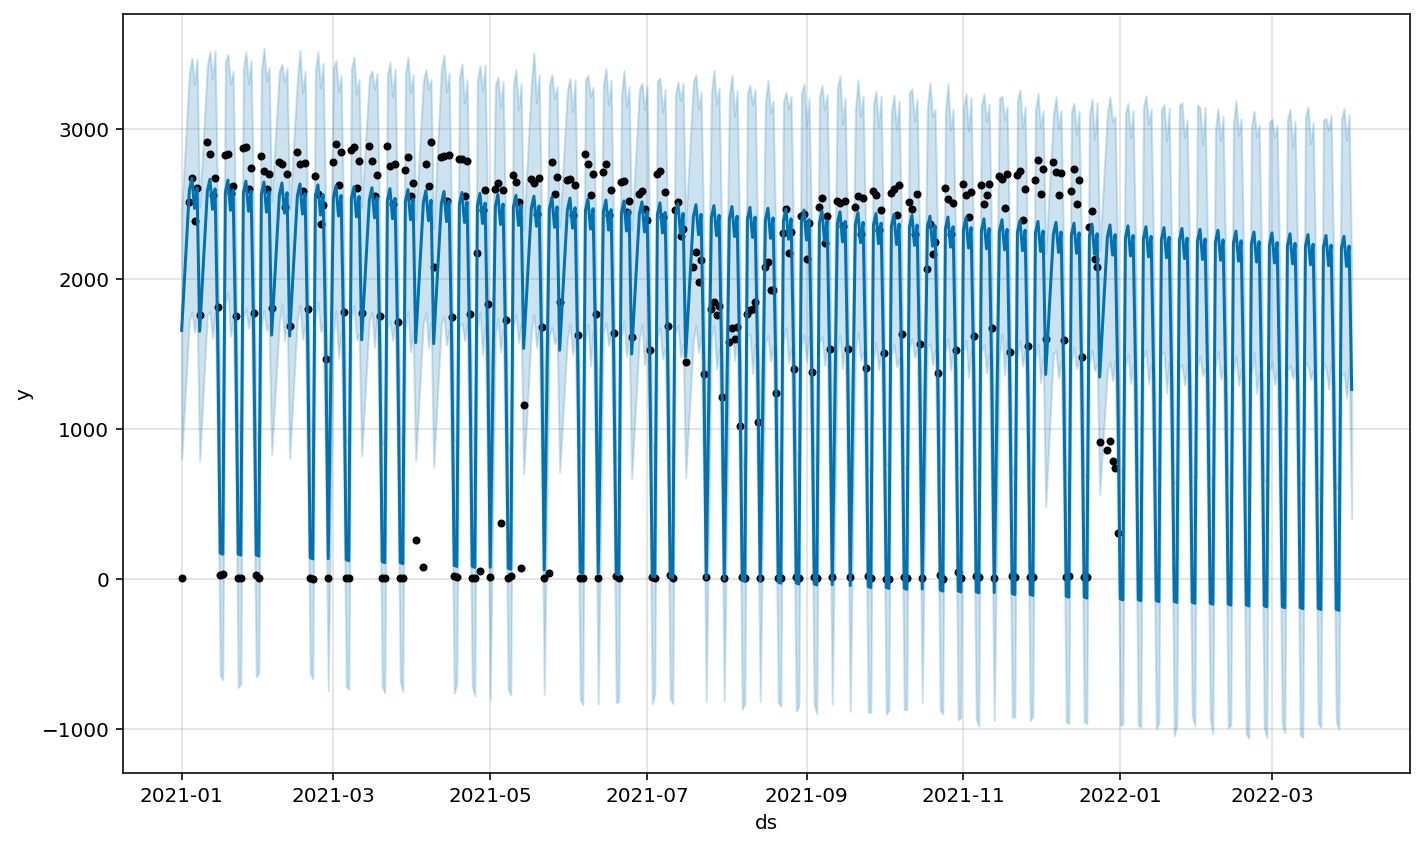

In [137]:
technischmanagement = tm.plot(forecasttm)

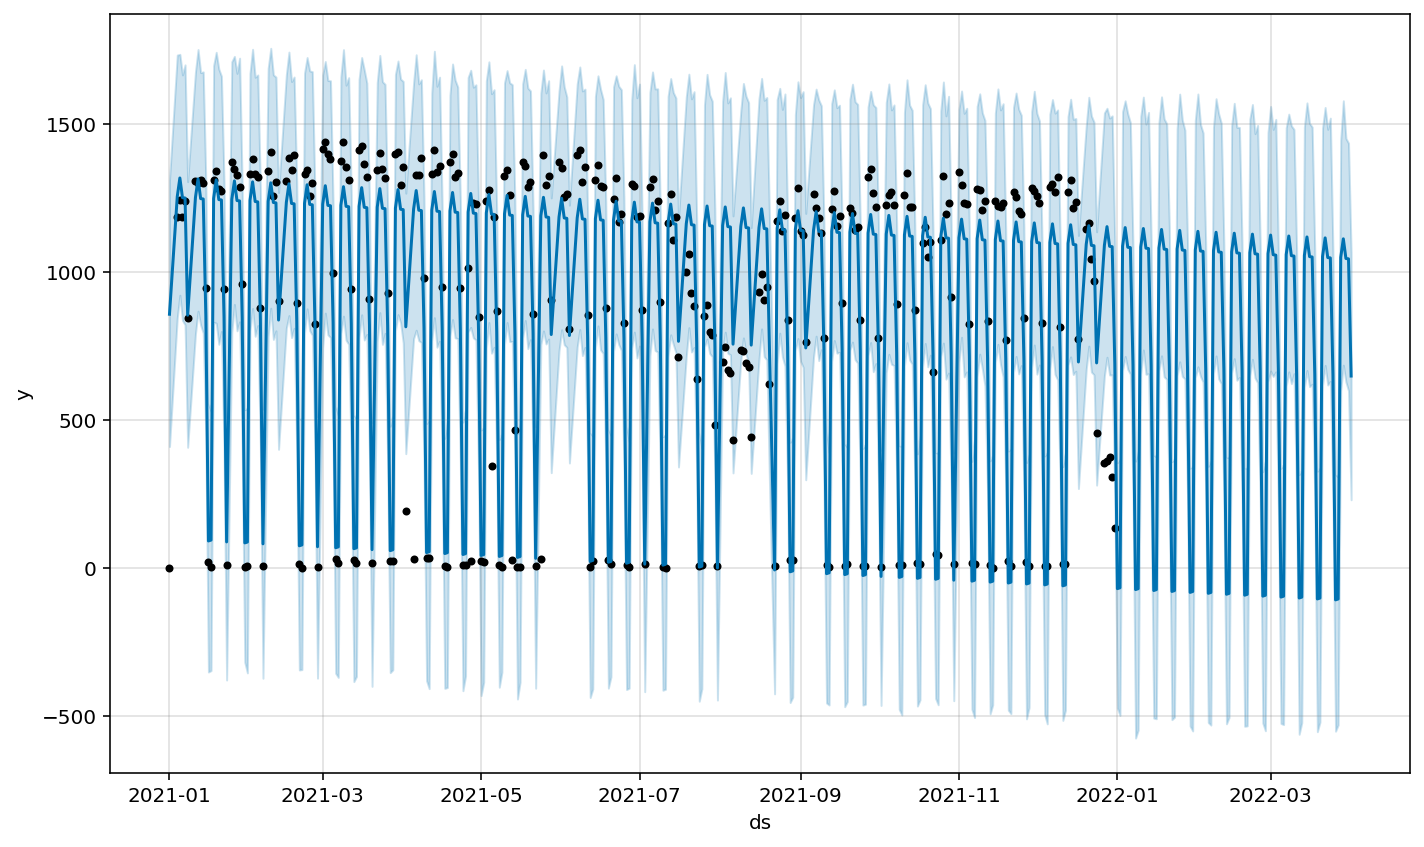

In [138]:
contractmanagement = cm.plot(forecastcm)

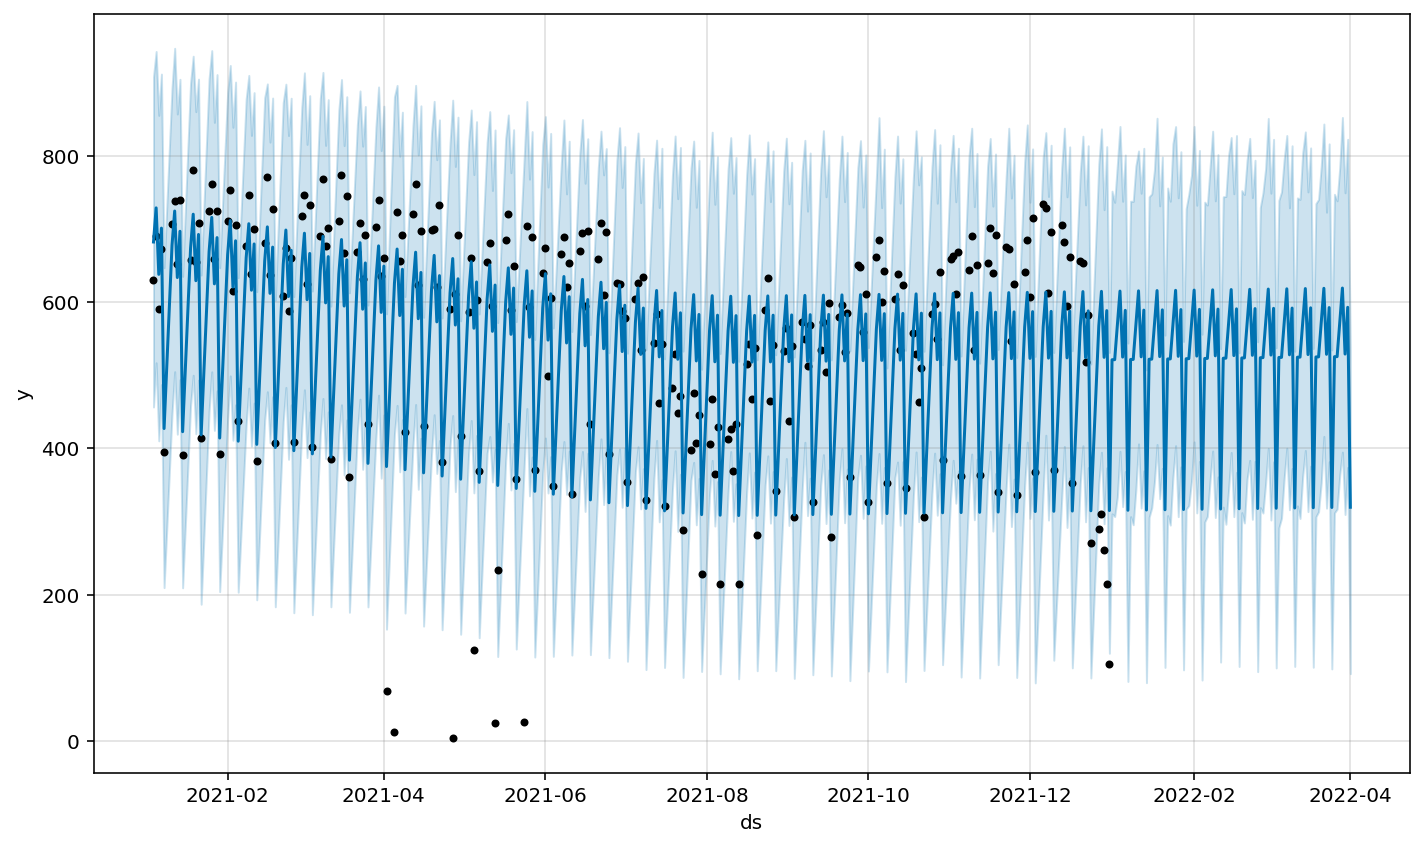

In [139]:
omgevingsmanagement = om.plot(forecastom)

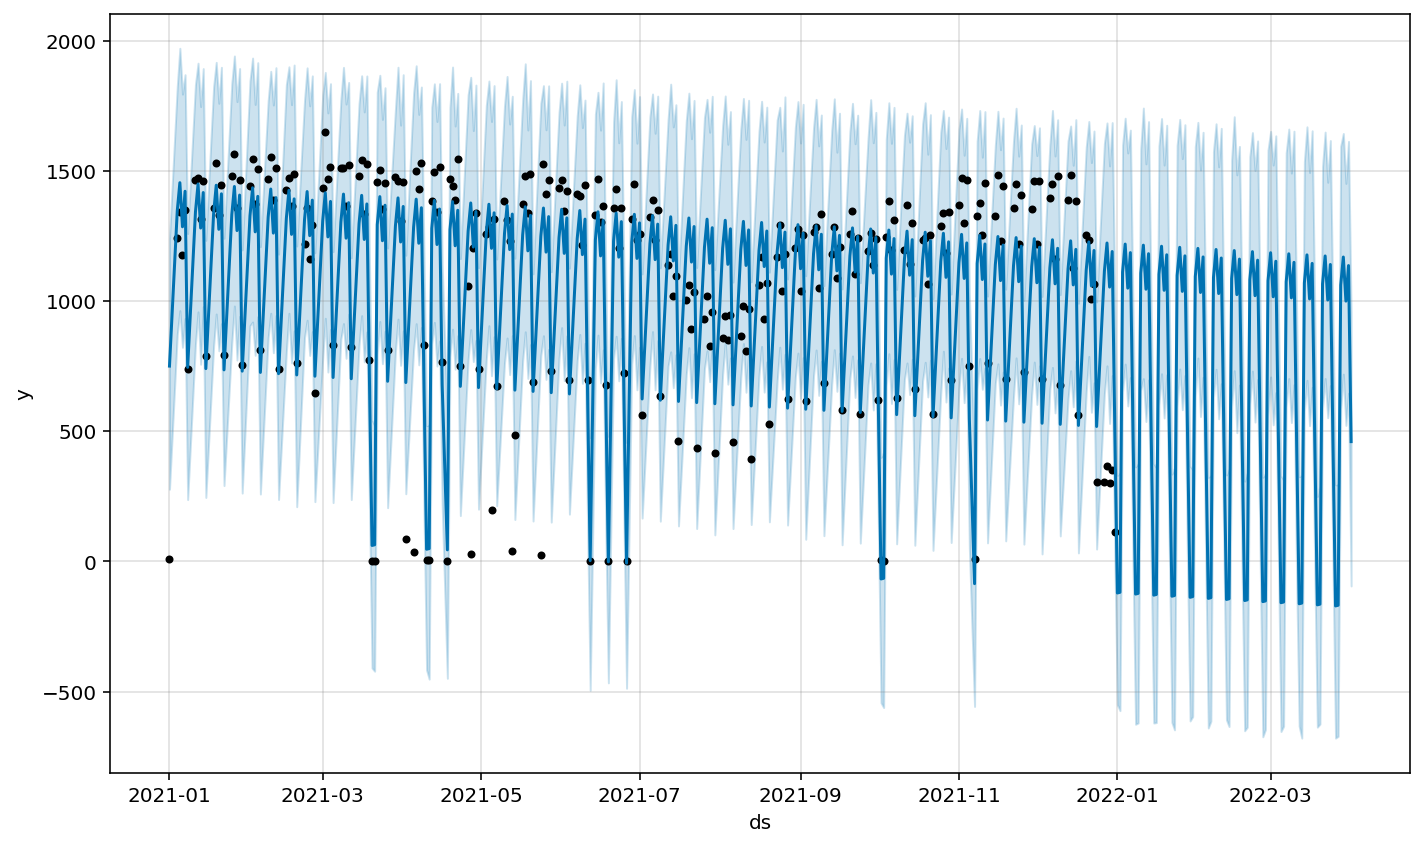

In [140]:
integraalsmanagement = ip.plot(forecastip)

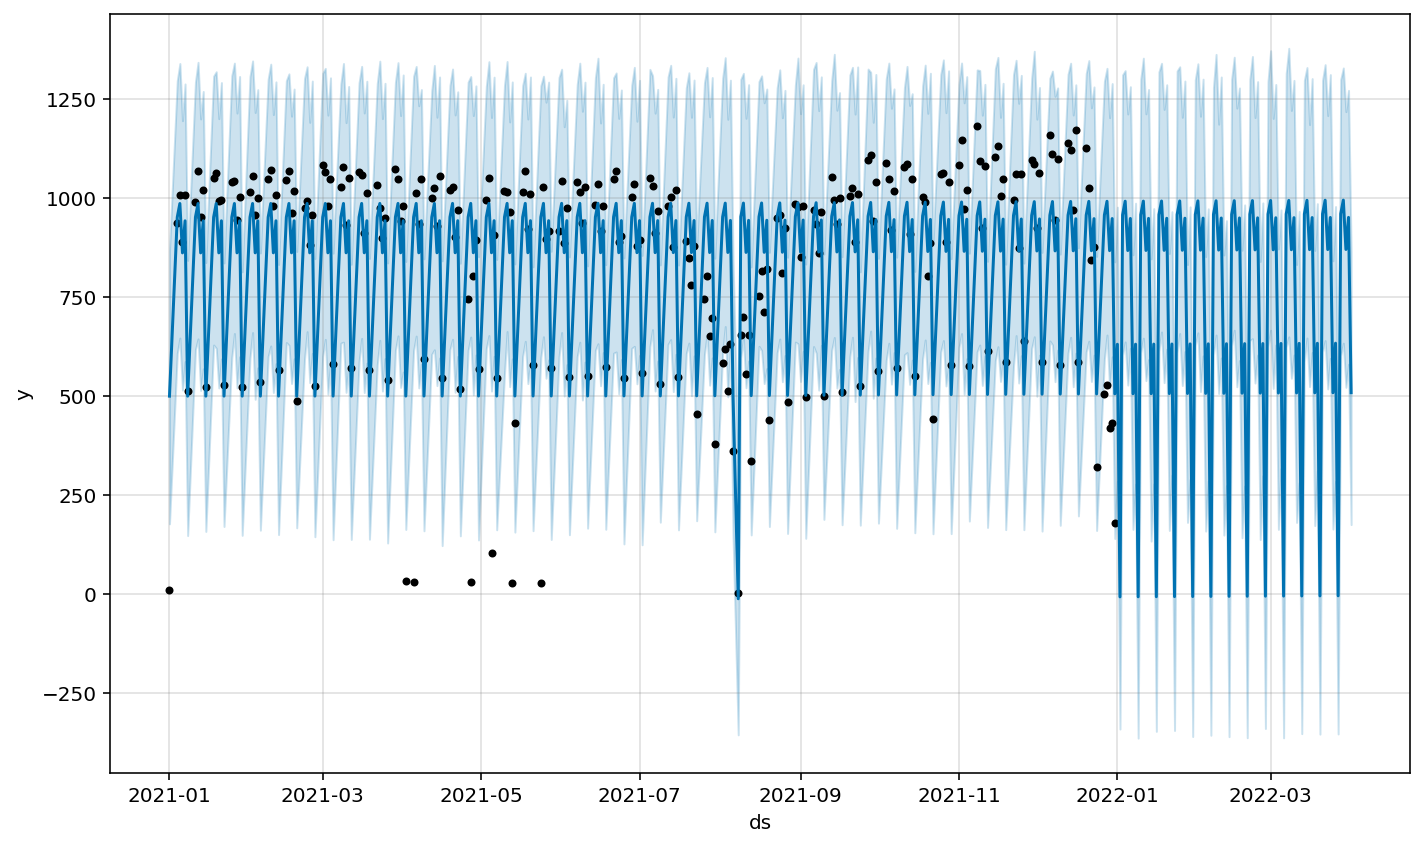

In [141]:
projectbeheersing = pb.plot(forecastpb)

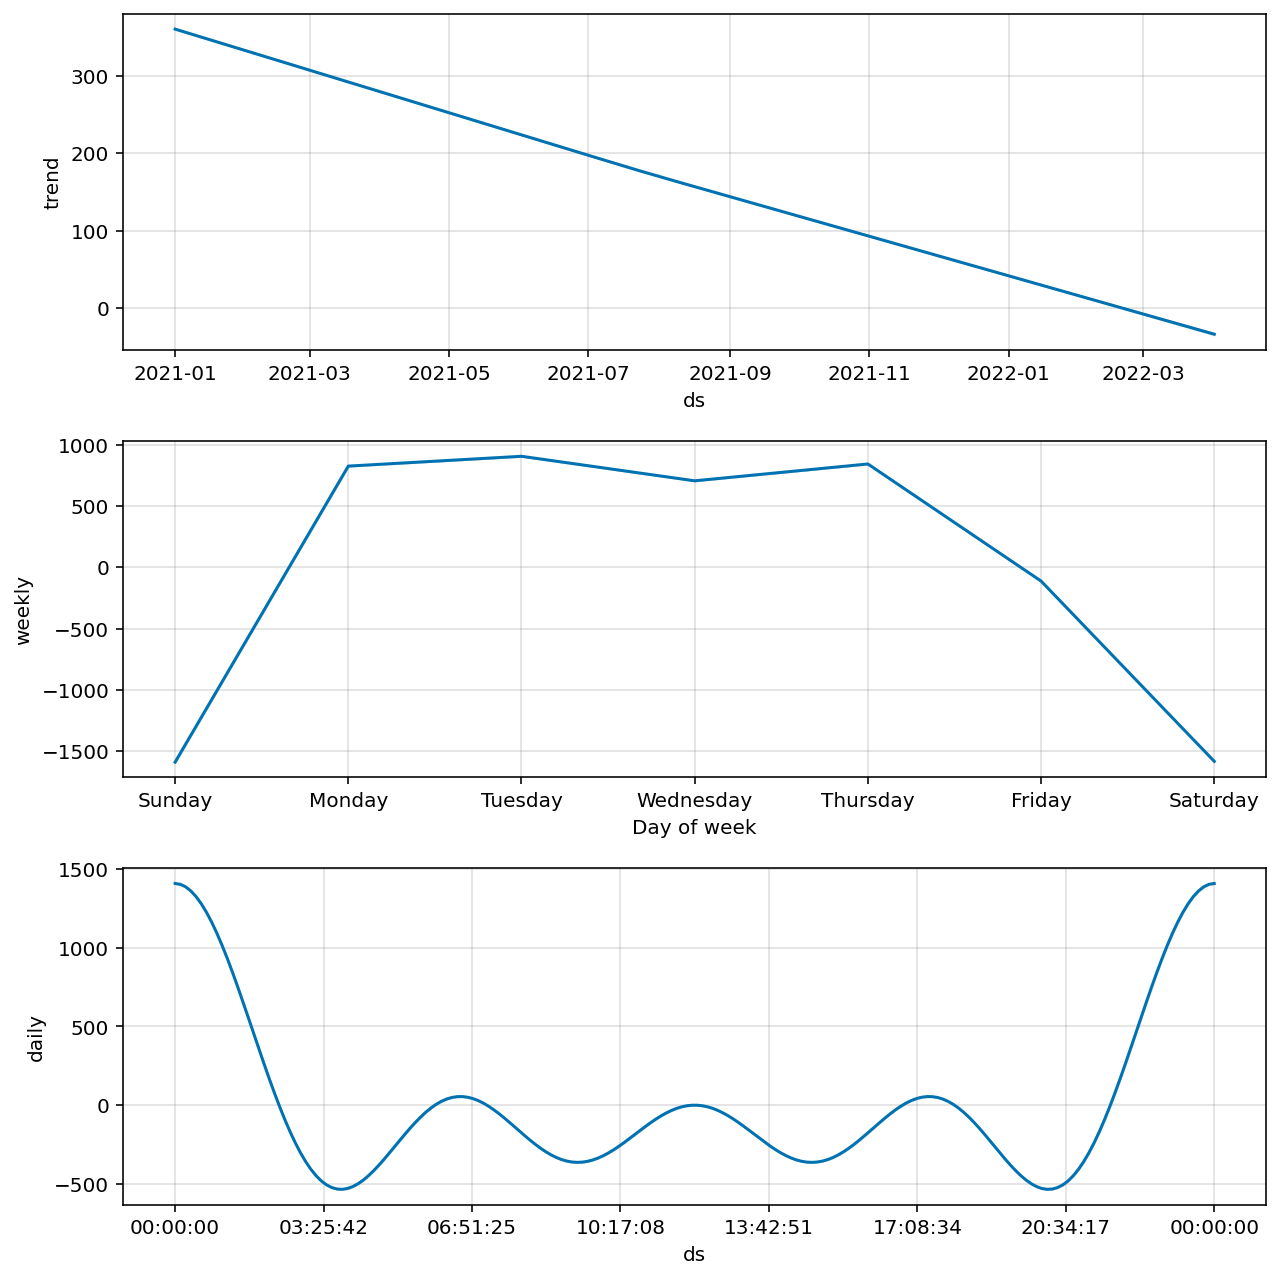

In [142]:
pltm = tm.plot_components(forecasttm)

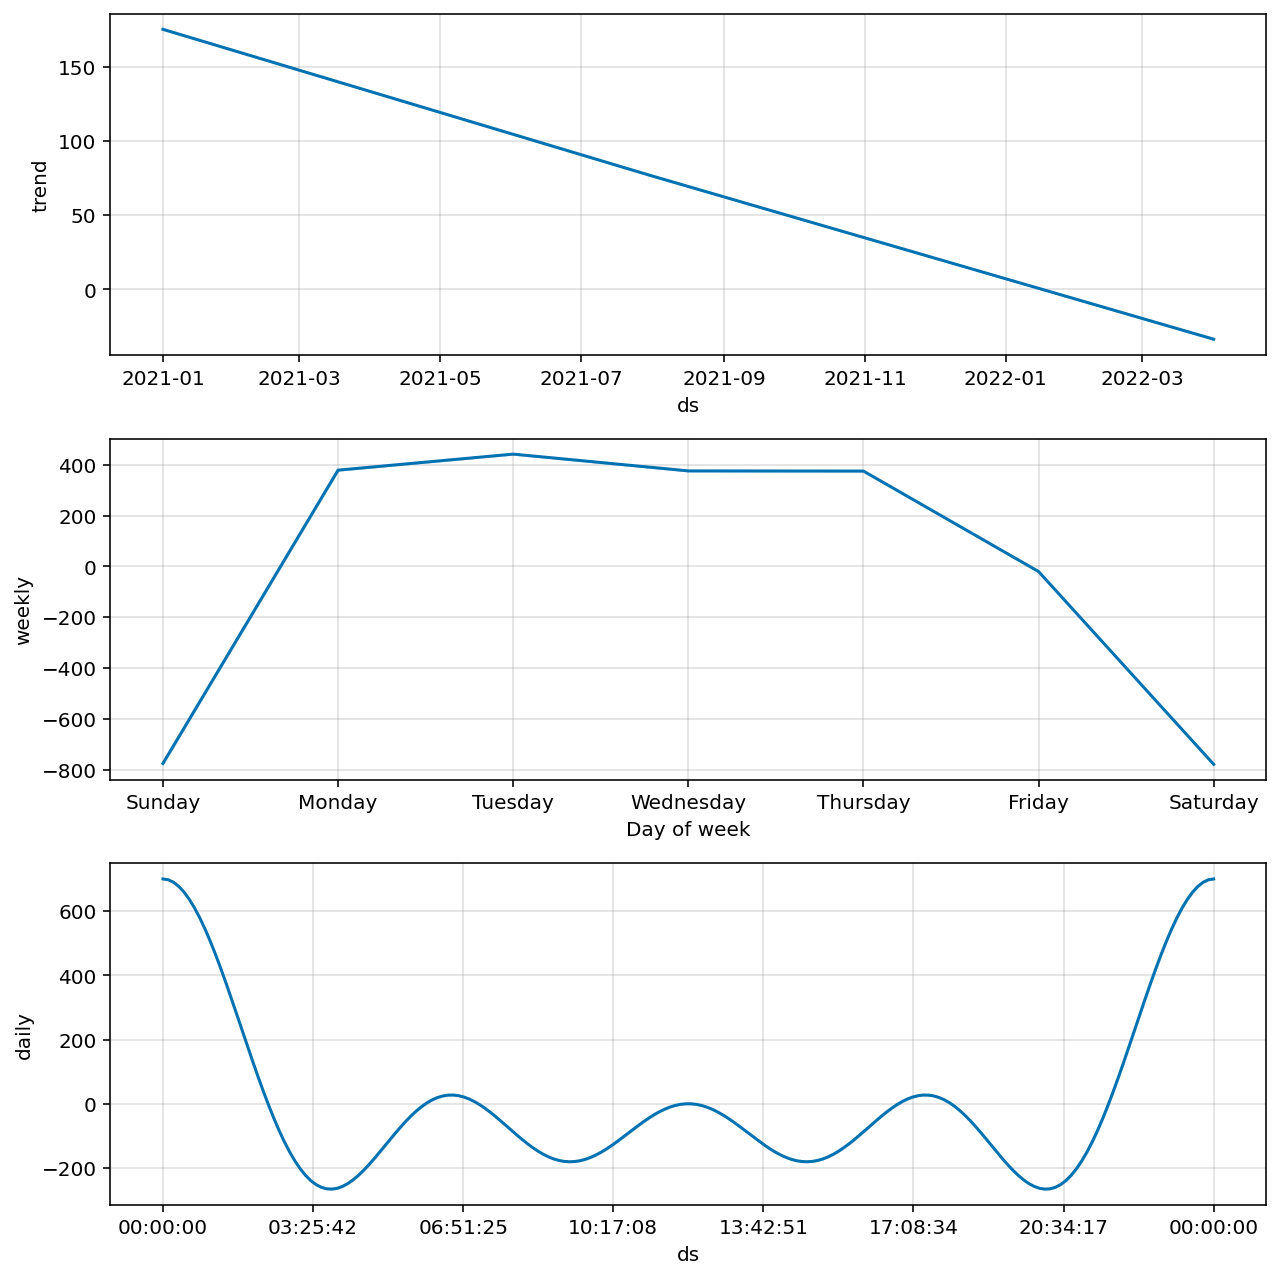

In [143]:
plcm = cm.plot_components(forecastcm)

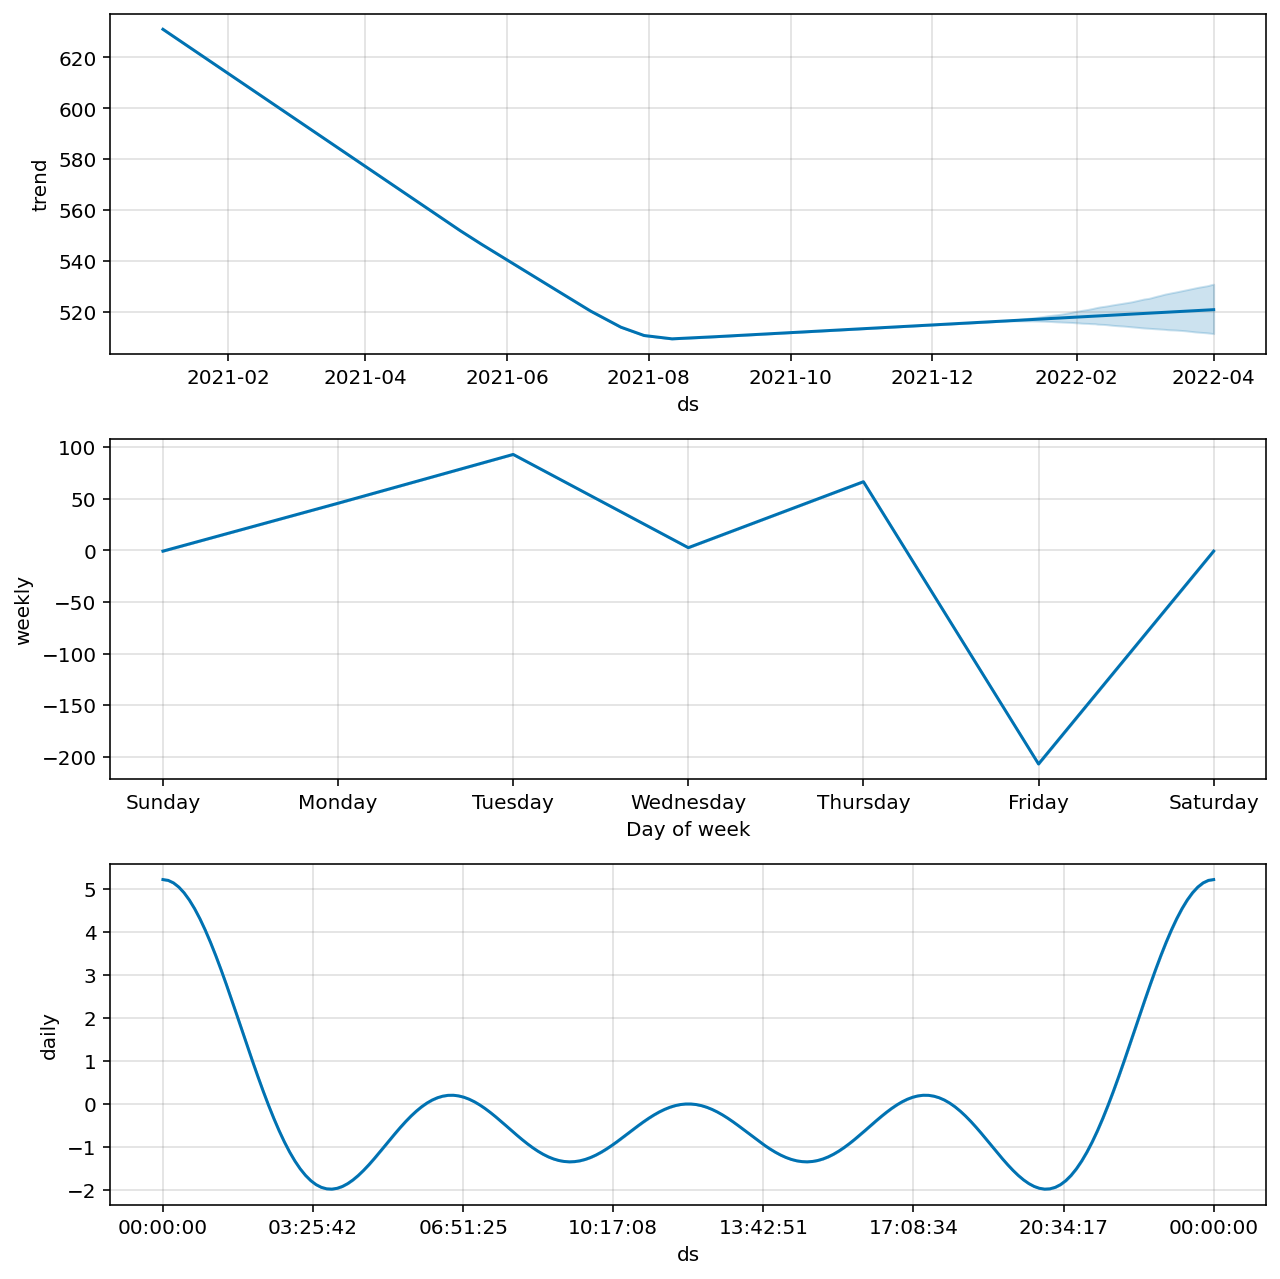

In [144]:
plom = om.plot_components(forecastom)

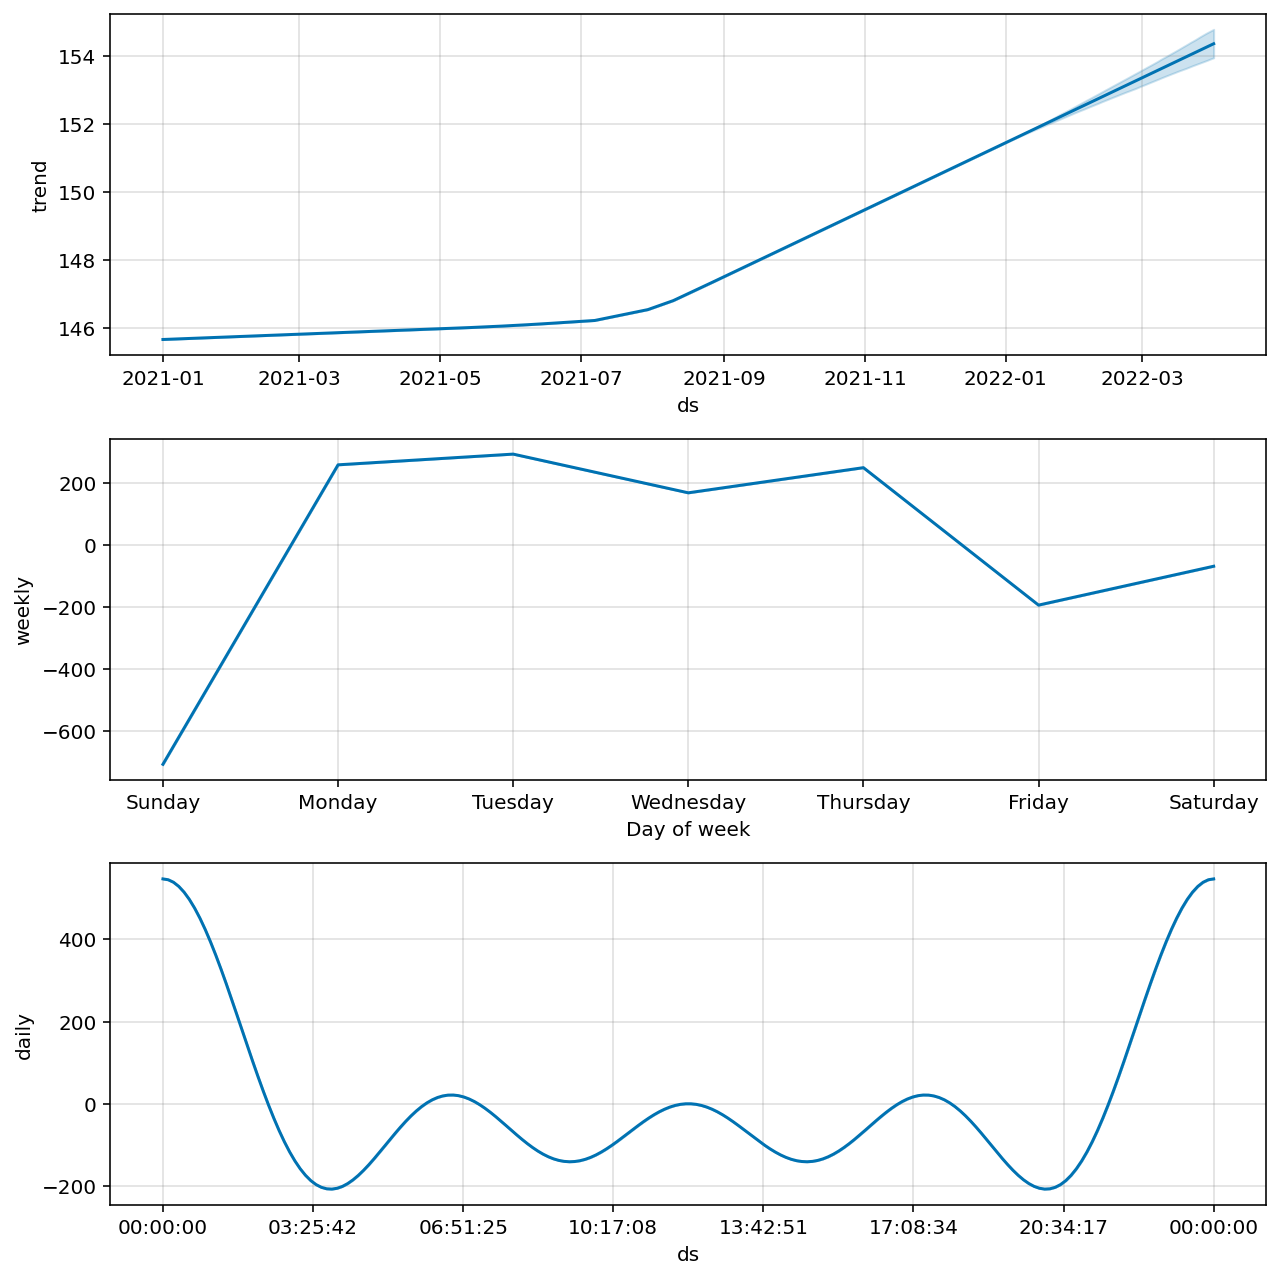

In [145]:
plpb = pb.plot_components(forecastpb)

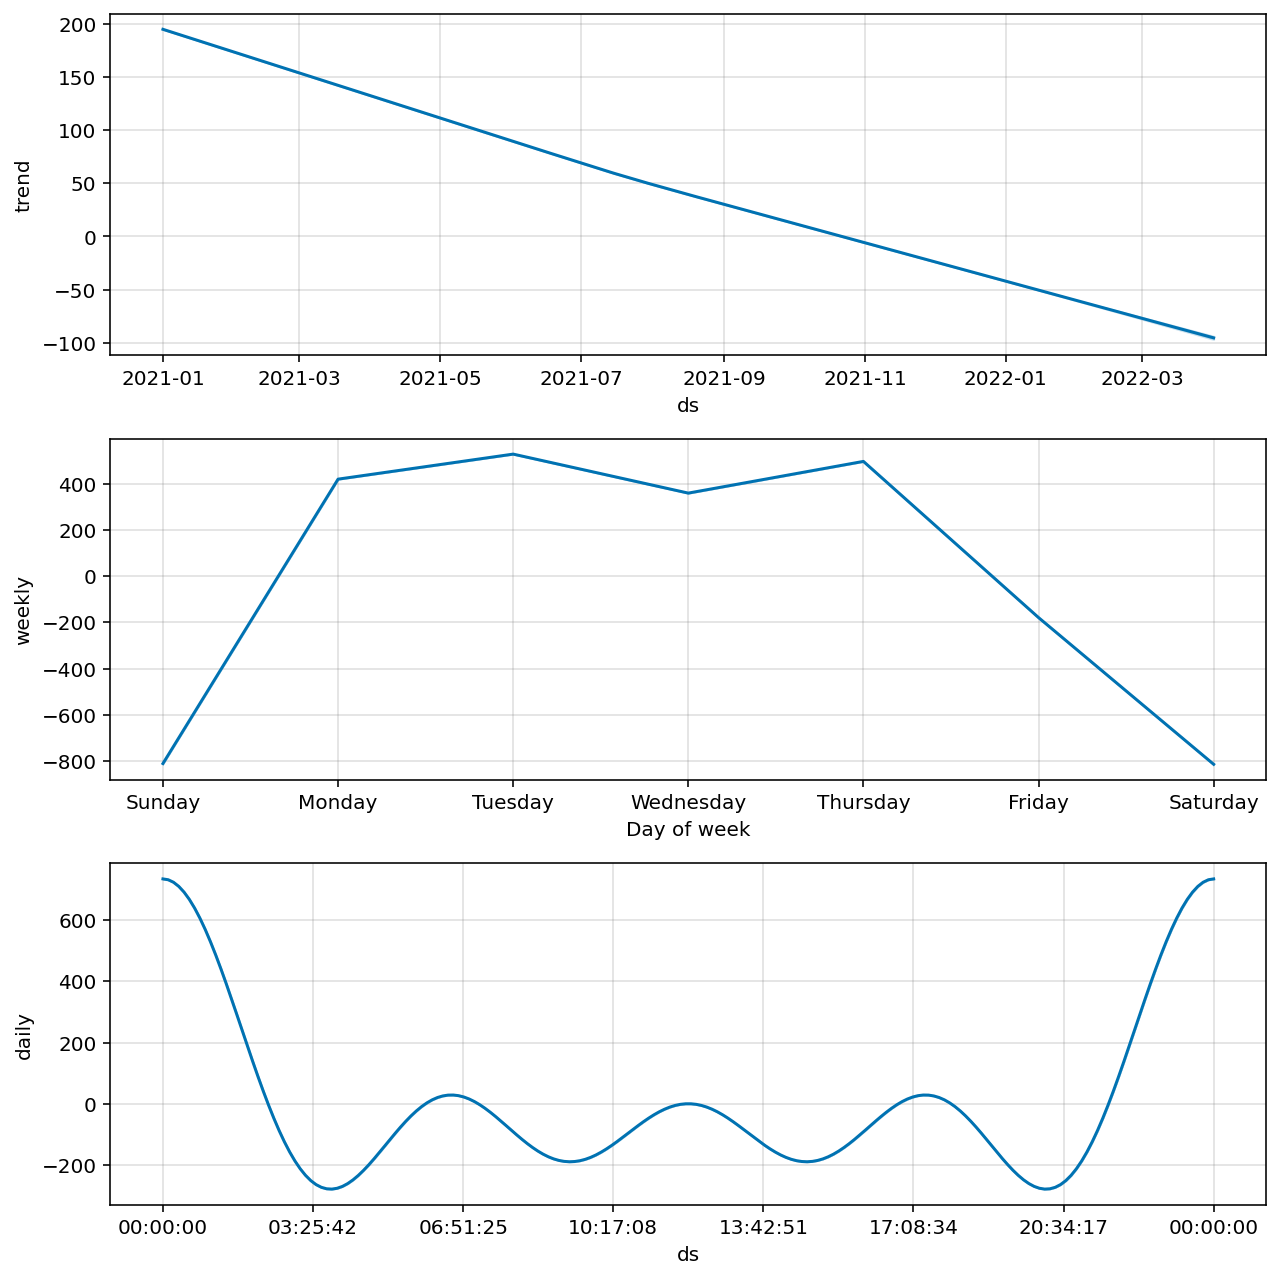

In [146]:
plip = ip.plot_components(forecastip)

In [147]:
TM = cross_validation(tm,initial='38 days', period='45 days', horizon = '91 days')
CM = cross_validation(cm,initial='38 days', period='45 days', horizon = '91 days')
OM = cross_validation(om,initial='38 days', period='45 days', horizon = '91 days')
IP = cross_validation(ip,initial='38 days', period='45 days', horizon = '91 days')
PB = cross_validation(pb,initial='38 days', period='45 days', horizon = '91 days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-02-18 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-02-18 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-02-18 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-02-18 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-02-18 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [148]:
df_tm = performance_metrics(TM)
df_cm = performance_metrics(CM)
df_om = performance_metrics(OM)
df_ip = performance_metrics(IP)
df_pb = performance_metrics(PB)

INFO:fbprophet:Skipping MAPE because y close to 0


In [149]:
df_tm

horizon            mse        rmse         mae       mape     mdape  \
0   9 days  279677.471296  528.845413  295.913669  16.673516  0.136211   
1  10 days  177261.172565  421.023957  257.767527  14.911703  0.119700   
2  11 days  175451.703564  418.869554  252.770733  12.025305  0.113778   
3  12 days  176171.974615  419.728453  256.427509   8.247235  0.112699   
4  13 days  174969.232524  418.293237  251.482914   6.906842  0.113778   
..     ...            ...         ...         ...        ...       ...   
78 87 days  446080.416387  667.892519  443.208115  10.953475  0.209987   
79 88 days  486482.723333  697.483135  469.366818  11.113381  0.230347   
80 89 days  518101.031651  719.792353  484.023272   9.688986  0.246026   
81 90 days  564962.324250  751.639757  509.857477   8.260297  0.259570   
82 91 days  578809.116950  760.795056  521.231889   9.068438  0.259570   

    coverage  
0   0.945578  
1   0.959184  
2   0.959184  
3   0.959184  
4   0.959184  
..       ...  
78  0.832653  
79  0.809524  
80  0.785714  
81  0.765306  
82  0.744898  

[83 rows x 7 columns]

In [150]:
df_cm.describe()

horizon            mse        rmse         mae  \
count                          83      83.000000   83.000000   83.000000   
mean             50 days 00:00:00   97015.192442  300.106772  218.328080   
std    24 days 02:29:40.553063914   48592.338377   83.880196   57.031485   
min               9 days 00:00:00   17843.891434  133.581029  113.320806   
25%              29 days 12:00:00   54689.217806  233.702922  183.452128   
50%              50 days 00:00:00   85539.466691  292.471309  226.404298   
75%              70 days 12:00:00  131823.683031  363.075070  254.459923   
max              91 days 00:00:00  201006.395591  448.337368  337.875941   

            mape      mdape   coverage  
count  83.000000  83.000000  83.000000  
mean    6.240125   0.232794   0.865795  
std     3.135397   0.081110   0.076482  
min     1.488866   0.115588   0.696667  
25%     4.251352   0.185933   0.813333  
50%     5.897676   0.215554   0.840000  
75%     7.757016   0.272928   0.943333  
max    17.428243   0.406978   1.000000

In [151]:
df_om.describe()

horizon           mse        rmse         mae  \
count                          82     82.000000   82.000000   82.000000   
mean             50 days 12:00:00  19918.363913  136.678191   93.743613   
std    23 days 19:33:58.568845364   8730.840029   35.393686   22.066747   
min              10 days 00:00:00   3525.639637   59.377097   47.402187   
25%              30 days 06:00:00  13572.877512  116.411345   75.882066   
50%              50 days 12:00:00  20731.360273  143.983863  101.371401   
75%              70 days 18:00:00  25409.217423  159.402575  110.058806   
max              91 days 00:00:00  36733.404970  191.659607  130.058308   

            mape      mdape   coverage  
count  82.000000  82.000000  82.000000  
mean    1.591510   0.136905   0.929409  
std     1.766051   0.045649   0.045432  
min     0.093643   0.059994   0.820513  
25%     0.271330   0.106233   0.897436  
50%     0.898319   0.131318   0.948718  
75%     2.184215   0.183269   0.969231  
max     4.885186   0.237585   1.000000

In [152]:
df_ip.describe()

horizon            mse        rmse         mae  \
count                          83      83.000000   83.000000   83.000000   
mean             50 days 00:00:00  142111.443386  364.156408  248.038720   
std    24 days 02:29:40.553063914   63628.168604   98.068478   57.361300   
min               9 days 00:00:00   20054.471471  141.613811  121.412710   
25%              29 days 12:00:00  100859.980970  317.534657  218.495389   
50%              50 days 00:00:00  159603.860893  399.504519  265.772819   
75%              70 days 12:00:00  187261.198644  432.736447  289.128521   
max              91 days 00:00:00  273024.205779  522.517182  330.121919   

           mdape   coverage  
count  83.000000  83.000000  
mean    0.184927   0.853761  
std     0.040320   0.065995  
min     0.116560   0.707317  
25%     0.142560   0.819512  
50%     0.191002   0.833333  
75%     0.213083   0.878049  
max     0.287838   1.000000

In [153]:
df_pb.describe()

horizon            mse        rmse         mae  \
count                          82      82.000000   82.000000   82.000000   
mean             50 days 12:00:00   57867.091359  231.970121  167.891533   
std    23 days 19:33:58.568845364   27197.369478   64.086193   41.412125   
min              10 days 00:00:00    9875.738409   99.376750   85.032419   
25%              30 days 06:00:00   34287.975855  185.151648  141.958795   
50%              50 days 12:00:00   65814.610602  256.542670  178.666080   
75%              70 days 18:00:00   76094.598902  275.852474  199.962031   
max              91 days 00:00:00  110802.416908  332.869970  228.164841   

            mape      mdape   coverage  
count  82.000000  82.000000  82.000000  
mean    2.684732   0.170444   0.878299  
std     3.361133   0.040670   0.068437  
min     0.100040   0.095063   0.717949  
25%     0.434339   0.138834   0.841026  
50%     1.136657   0.170941   0.871795  
75%     2.603663   0.195998   0.923077  
max    10.385828   0.256352   1.000000

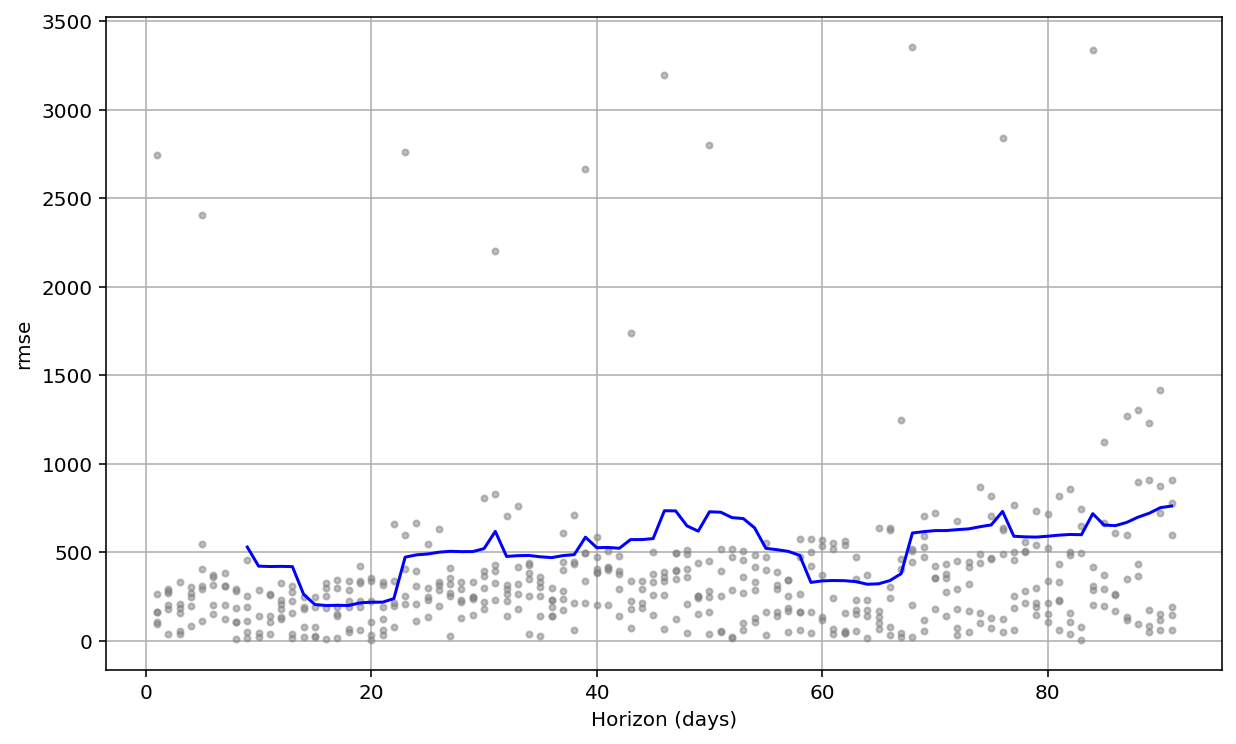

In [154]:
figTM = plot_cross_validation_metric(TM, metric='rmse')

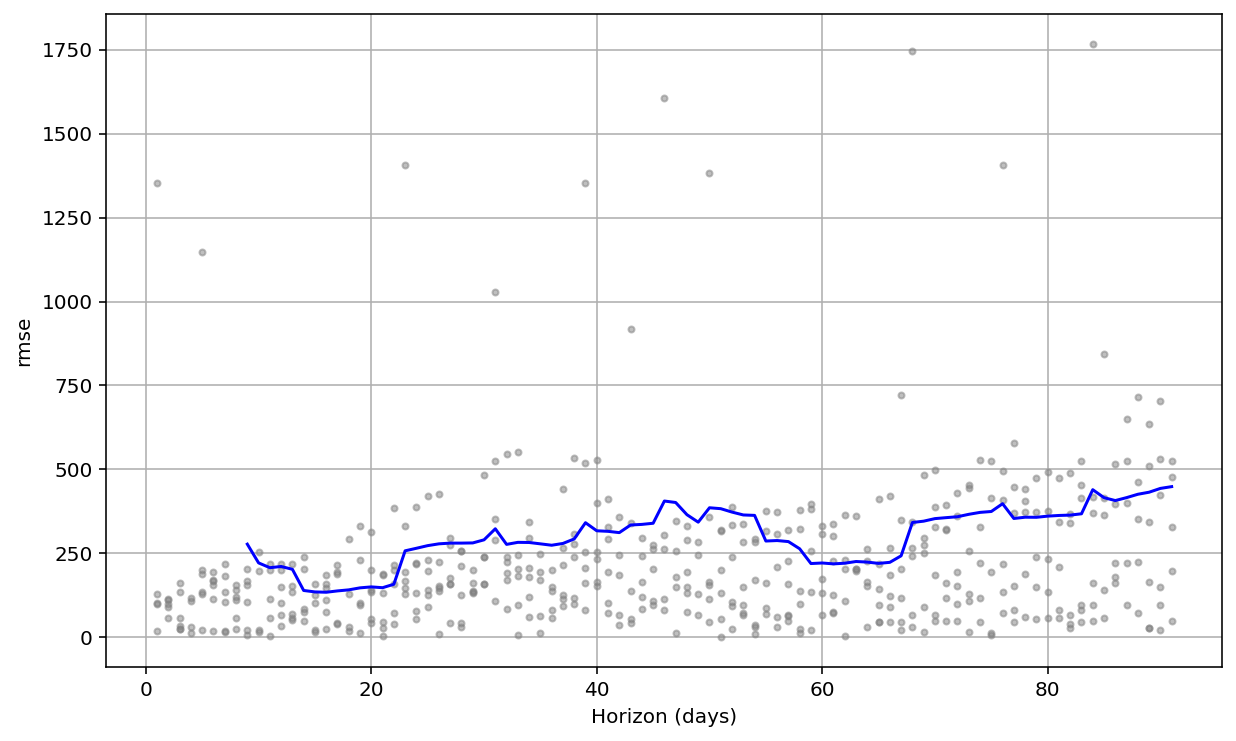

In [155]:
figCM = plot_cross_validation_metric(CM, metric='rmse')

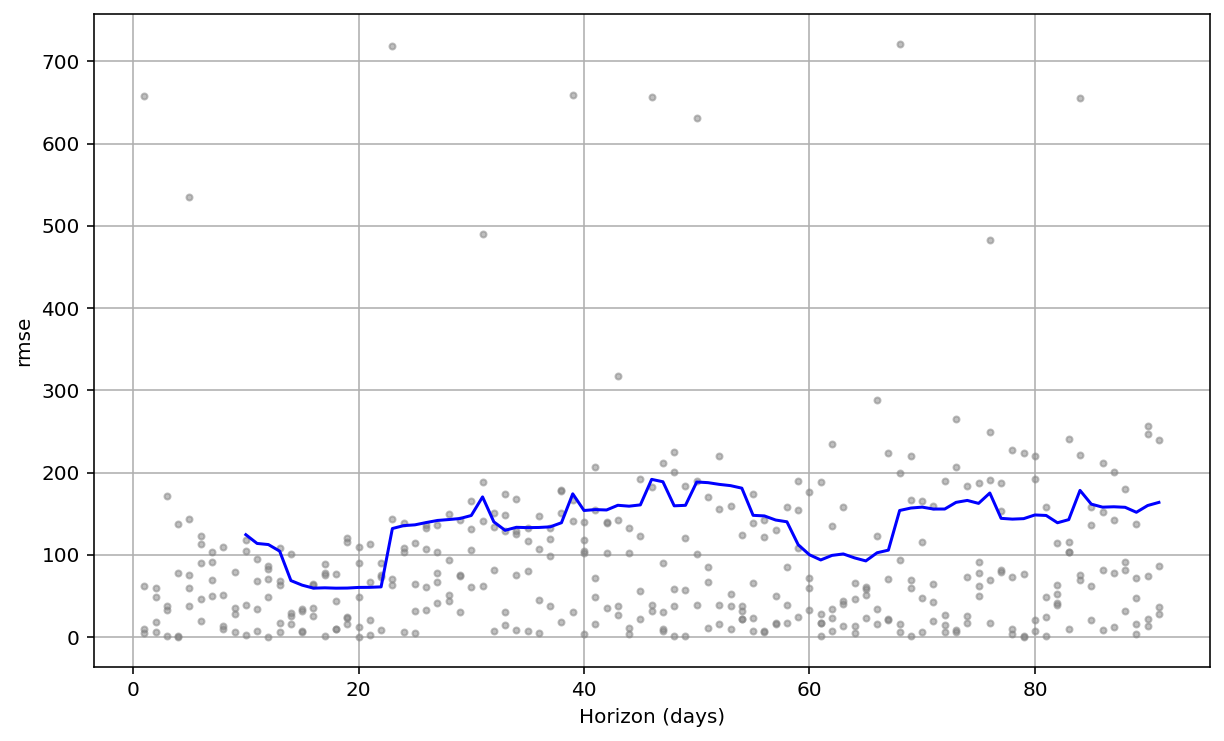

In [156]:
figOM = plot_cross_validation_metric(OM, metric='rmse')

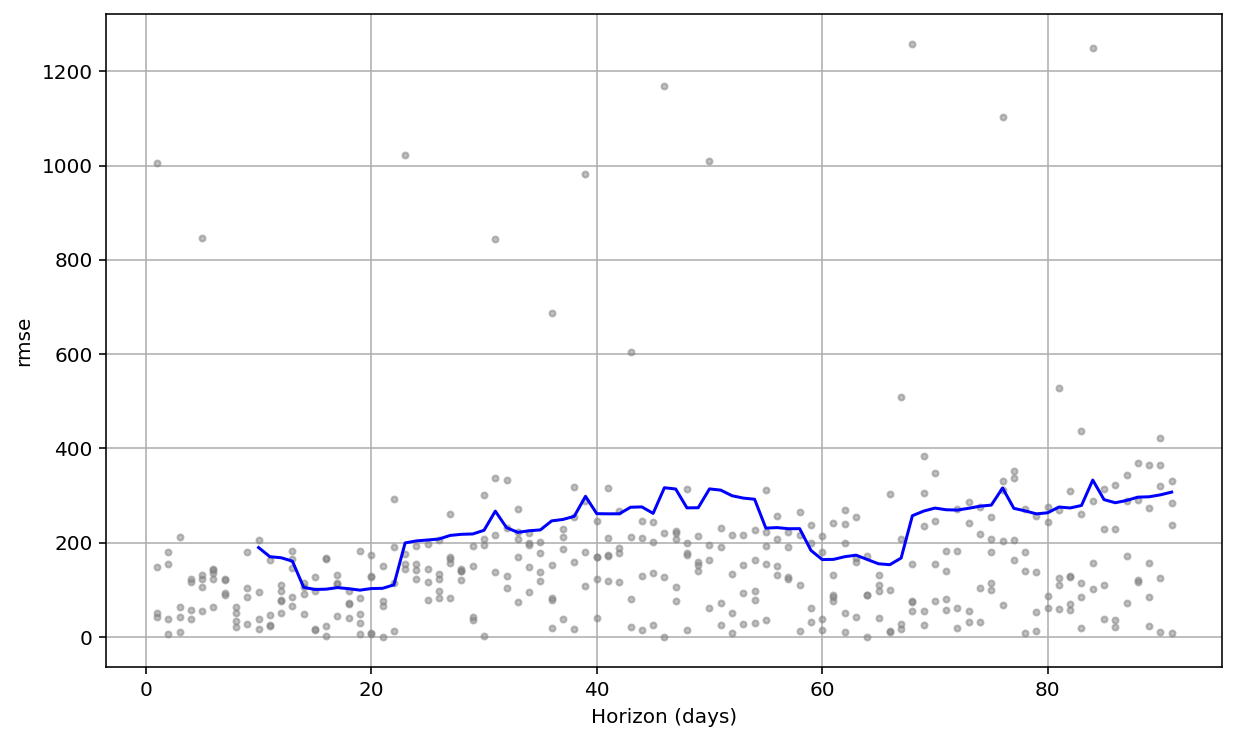

In [157]:
figPB = plot_cross_validation_metric(PB, metric='rmse')

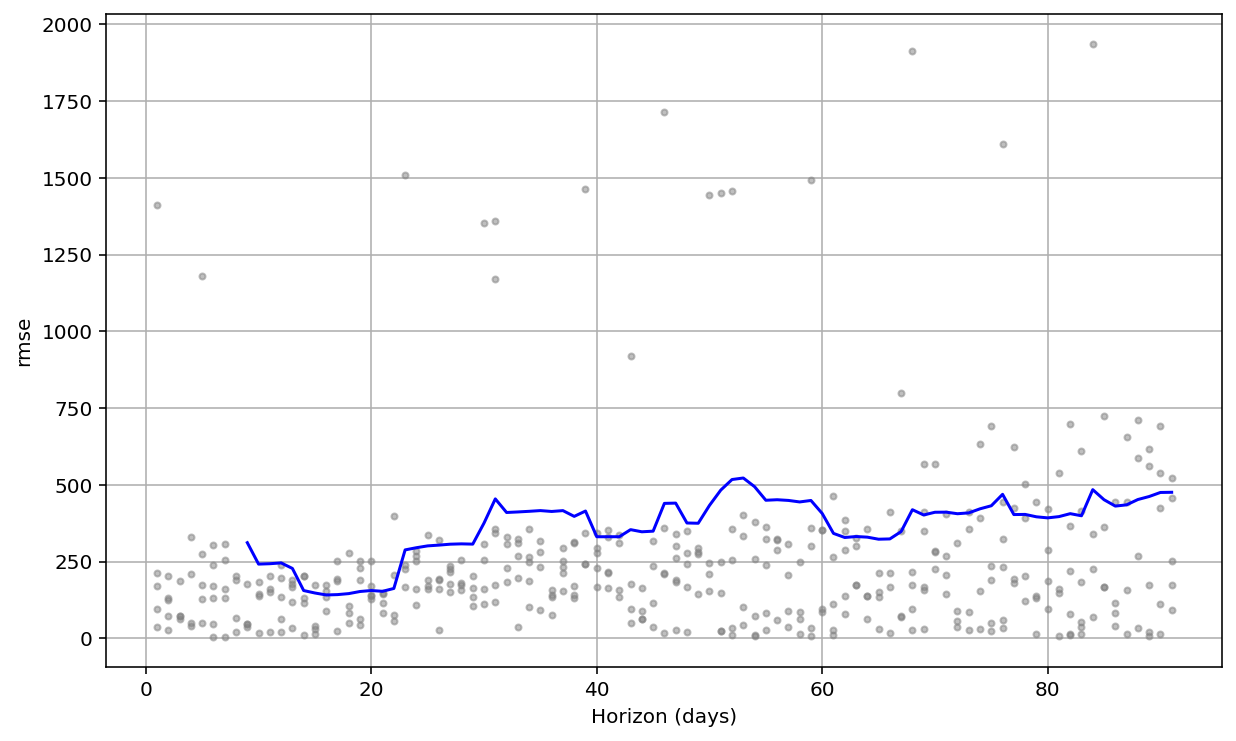

In [158]:
figIP = plot_cross_validation_metric(IP, metric='rmse')

In [159]:
cols_to_keep = ['ds','yhat_lower','yhat','yhat_upper']

In [160]:
excel_pb = forecastpb[cols_to_keep]
excel_cm = forecastcm[cols_to_keep]
excel_om = forecastom[cols_to_keep]
excel_ip = forecastip[cols_to_keep]
excel_tm = forecasttm[cols_to_keep]

In [161]:
excel_cm.tail(5)

ds  yhat_lower         yhat   yhat_upper
417 2022-03-28  598.400828  1048.723962  1445.106893
418 2022-03-29  684.679413  1111.386606  1577.544651
419 2022-03-30  627.767287  1044.927929  1450.663697
420 2022-03-31  598.569132  1043.772327  1434.374904
421 2022-04-01  230.094466   648.006599  1064.143077

In [162]:
excel_projectbeheersing = excel_pb.rename(columns = {'ds':'datum', 'yhat_lower':'pb_yhat_lower','yhat':'pb_yhat_','yhat_upper':'pb_yhat_upper'}, inplace = True)

In [163]:
excel_technischmanagement = excel_tm.rename(columns = {'ds':'datum', 'yhat_lower':'tm_yhat_lower','yhat':'tm_yhat_','yhat_upper':'tm_yhat_upper'}, inplace = True)

In [164]:
excel_omgevingsmanagement = excel_om.rename(columns = {'ds':'datum', 'yhat_lower':'om_yhat_lower','yhat':'om_yhat_','yhat_upper':'om_yhat_upper'}, inplace = True)

In [165]:
excel_contractmanagement = excel_cm.rename(columns = {'ds':'datum', 'yhat_lower':'cm_yhat_lower','yhat':'cm_yhat_','yhat_upper':'cm_yhat_upper'}, inplace = True)

In [166]:
excel_intergraalprojectleider = excel_ip.rename(columns = {'ds':'datum', 'yhat_lower':'ip_yhat_lower','yhat':'ip_yhat_','yhat_upper':'ip_yhat_upper'}, inplace = True)

In [167]:
excelpb_om = excel_pb.merge(excel_om, how='outer', on='datum')
excelpb_om

datum  pb_yhat_lower    pb_yhat_  pb_yhat_upper  om_yhat_lower  \
0   2021-01-01     176.609266  499.056821     866.223230            NaN   
1   2021-01-04     606.902872  950.865103    1295.565249     456.525788   
2   2021-01-05     645.642060  985.379937    1338.791958     516.962225   
3   2021-01-06     514.380663  860.733111    1194.446853     410.253369   
4   2021-01-07     586.404075  941.712000    1287.201501     487.131480   
..         ...            ...         ...            ...            ...   
348 2022-03-28     601.467327  959.425244    1298.546794     363.439867   
349 2022-03-29     632.711900  993.969781    1327.538087     394.816888   
350 2022-03-30     521.258194  869.352659    1217.337476     309.556140   
351 2022-03-31     579.582699  950.361252    1271.009066     373.950975   
352 2022-04-01     174.746629  507.754078     864.825278      92.057814   

       om_yhat_  om_yhat_upper  
0           NaN            NaN  
1    682.023658     907.631197  
2    728.661862     942.372628  
3    637.759349     855.079791  
4    700.999853     911.465185  
..          ...            ...  
348  571.782333     784.265426  
349  619.088299     852.221193  
350  528.853547     749.267641  
351  592.761814     822.354228  
352  319.510397     534.303624  

[353 rows x 7 columns]

In [168]:
excelpb_om_tm = excelpb_om.merge(excel_tm, how='outer', on='datum')
excelpb_om_tm

datum  pb_yhat_lower    pb_yhat_  pb_yhat_upper  om_yhat_lower  \
0   2021-01-01     176.609266  499.056821     866.223230            NaN   
1   2021-01-04     606.902872  950.865103    1295.565249     456.525788   
2   2021-01-05     645.642060  985.379937    1338.791958     516.962225   
3   2021-01-06     514.380663  860.733111    1194.446853     410.253369   
4   2021-01-07     586.404075  941.712000    1287.201501     487.131480   
..         ...            ...         ...            ...            ...   
414 2021-11-28            NaN         NaN            NaN            NaN   
415 2021-12-11            NaN         NaN            NaN            NaN   
416 2021-12-12            NaN         NaN            NaN            NaN   
417 2021-12-18            NaN         NaN            NaN            NaN   
418 2021-12-19            NaN         NaN            NaN            NaN   

       om_yhat_  om_yhat_upper  tm_yhat_lower     tm_yhat_  tm_yhat_upper  
0           NaN            NaN     799.595494  1657.385856    2460.228099  
1    682.023658     907.631197    1721.259395  2593.095310    3374.330151  
2    728.661862     942.372628    1779.841887  2672.255698    3474.577136  
3    637.759349     855.079791    1646.705644  2471.196880    3297.796227  
4    700.999853     911.465185    1774.844539  2607.660207    3467.954672  
..          ...            ...            ...          ...            ...  
414         NaN            NaN    -917.317597  -110.460302     638.481958  
415         NaN            NaN    -953.950619  -114.792942     721.750933  
416         NaN            NaN    -964.663344  -122.172239     668.024275  
417         NaN            NaN    -952.384837  -120.648911     690.661076  
418         NaN            NaN    -968.398339  -128.028208     695.877358  

[419 rows x 10 columns]

In [169]:
excelpb_om_tm_ip = excelpb_om_tm.merge(excel_ip, how='outer', on='datum')
excelpb_om_tm_ip

datum  pb_yhat_lower    pb_yhat_  pb_yhat_upper  om_yhat_lower  \
0   2021-01-01     176.609266  499.056821     866.223230            NaN   
1   2021-01-04     606.902872  950.865103    1295.565249     456.525788   
2   2021-01-05     645.642060  985.379937    1338.791958     516.962225   
3   2021-01-06     514.380663  860.733111    1194.446853     410.253369   
4   2021-01-07     586.404075  941.712000    1287.201501     487.131480   
..         ...            ...         ...            ...            ...   
417 2021-12-18            NaN         NaN            NaN            NaN   
418 2021-12-19            NaN         NaN            NaN            NaN   
419 2021-04-10            NaN         NaN            NaN            NaN   
420 2021-04-11            NaN         NaN            NaN            NaN   
421 2021-06-26            NaN         NaN            NaN            NaN   

       om_yhat_  om_yhat_upper  tm_yhat_lower     tm_yhat_  tm_yhat_upper  \
0           NaN            NaN     799.595494  1657.385856    2460.228099   
1    682.023658     907.631197    1721.259395  2593.095310    3374.330151   
2    728.661862     942.372628    1779.841887  2672.255698    3474.577136   
3    637.759349     855.079791    1646.705644  2471.196880    3297.796227   
4    700.999853     911.465185    1774.844539  2607.660207    3467.954672   
..          ...            ...            ...          ...            ...   
417         NaN            NaN    -952.384837  -120.648911     690.661076   
418         NaN            NaN    -968.398339  -128.028208     695.877358   
419         NaN            NaN            NaN          NaN            NaN   
420         NaN            NaN            NaN          NaN            NaN   
421         NaN            NaN            NaN          NaN            NaN   

     ip_yhat_lower     ip_yhat_  ip_yhat_upper  
0       277.564918   750.632073    1240.012298  
1       872.565860  1347.575687    1825.102034  
2       963.513787  1455.242130    1971.568610  
3       822.817043  1285.802108    1795.457988  
4       933.268252  1422.287556    1870.033491  
..             ...          ...            ...  
417            NaN          NaN            NaN  
418            NaN          NaN            NaN  
419    -416.753020    46.968483     521.663850  
420    -451.943697    49.434396     524.385010  
421    -487.137552    -6.407698     456.972832  

[422 rows x 13 columns]

In [170]:
excelpb_om_tm_ip_cm = excelpb_om_tm_ip.merge(excel_cm, how='outer', on='datum')
excelpb_om_tm_ip_cm

datum  pb_yhat_lower    pb_yhat_  pb_yhat_upper  om_yhat_lower  \
0   2021-01-01     176.609266  499.056821     866.223230            NaN   
1   2021-01-04     606.902872  950.865103    1295.565249     456.525788   
2   2021-01-05     645.642060  985.379937    1338.791958     516.962225   
3   2021-01-06     514.380663  860.733111    1194.446853     410.253369   
4   2021-01-07     586.404075  941.712000    1287.201501     487.131480   
..         ...            ...         ...            ...            ...   
432 2021-09-19            NaN         NaN            NaN            NaN   
433 2021-10-17            NaN         NaN            NaN            NaN   
434 2021-11-14            NaN         NaN            NaN            NaN   
435 2021-12-04            NaN         NaN            NaN            NaN   
436 2021-12-05            NaN         NaN            NaN            NaN   

       om_yhat_  om_yhat_upper  tm_yhat_lower     tm_yhat_  tm_yhat_upper  \
0           NaN            NaN     799.595494  1657.385856    2460.228099   
1    682.023658     907.631197    1721.259395  2593.095310    3374.330151   
2    728.661862     942.372628    1779.841887  2672.255698    3474.577136   
3    637.759349     855.079791    1646.705644  2471.196880    3297.796227   
4    700.999853     911.465185    1774.844539  2607.660207    3467.954672   
..          ...            ...            ...          ...            ...   
432         NaN            NaN            NaN          NaN            NaN   
433         NaN            NaN            NaN          NaN            NaN   
434         NaN            NaN            NaN          NaN            NaN   
435         NaN            NaN            NaN          NaN            NaN   
436         NaN            NaN            NaN          NaN            NaN   

     ip_yhat_lower     ip_yhat_  ip_yhat_upper  cm_yhat_lower     cm_yhat_  \
0       277.564918   750.632073    1240.012298     409.947390   856.697876   
1       872.565860  1347.575687    1825.102034     845.070655  1254.207717   
2       963.513787  1455.242130    1971.568610     920.814617  1316.855751   
3       822.817043  1285.802108    1795.457988     835.842384  1250.382462   
4       933.268252  1422.287556    1870.033491     821.000374  1249.212250   
..             ...          ...            ...            ...          ...   
432            NaN          NaN            NaN    -451.325767   -19.584313   
433            NaN          NaN            NaN    -445.521923   -32.239069   
434            NaN          NaN            NaN    -462.484157   -44.893829   
435            NaN          NaN            NaN    -495.271626   -57.310267   
436            NaN          NaN            NaN    -526.611247   -54.384899   

     cm_yhat_upper  
0      1309.149488  
1      1731.974332  
2      1734.449186  
3      1664.888498  
4      1698.770376  
..             ...  
432     406.754607  
433     447.488203  
434     379.882207  
435     378.123994  
436     389.860423  

[437 rows x 16 columns]

In [171]:
excelpb_om_tm_ip_cm.isna().sum()

datum             0
pb_yhat_lower    84
pb_yhat_         84
pb_yhat_upper    84
om_yhat_lower    86
om_yhat_         86
om_yhat_upper    86
tm_yhat_lower    18
tm_yhat_         18
tm_yhat_upper    18
ip_yhat_lower    74
ip_yhat_         74
ip_yhat_upper    74
cm_yhat_lower    15
cm_yhat_         15
cm_yhat_upper    15
dtype: int64

In [172]:
data_with_nulls = excelpb_om_tm_ip_cm
data_with_nulls

datum  pb_yhat_lower    pb_yhat_  pb_yhat_upper  om_yhat_lower  \
0   2021-01-01     176.609266  499.056821     866.223230            NaN   
1   2021-01-04     606.902872  950.865103    1295.565249     456.525788   
2   2021-01-05     645.642060  985.379937    1338.791958     516.962225   
3   2021-01-06     514.380663  860.733111    1194.446853     410.253369   
4   2021-01-07     586.404075  941.712000    1287.201501     487.131480   
..         ...            ...         ...            ...            ...   
432 2021-09-19            NaN         NaN            NaN            NaN   
433 2021-10-17            NaN         NaN            NaN            NaN   
434 2021-11-14            NaN         NaN            NaN            NaN   
435 2021-12-04            NaN         NaN            NaN            NaN   
436 2021-12-05            NaN         NaN            NaN            NaN   

       om_yhat_  om_yhat_upper  tm_yhat_lower     tm_yhat_  tm_yhat_upper  \
0           NaN            NaN     799.595494  1657.385856    2460.228099   
1    682.023658     907.631197    1721.259395  2593.095310    3374.330151   
2    728.661862     942.372628    1779.841887  2672.255698    3474.577136   
3    637.759349     855.079791    1646.705644  2471.196880    3297.796227   
4    700.999853     911.465185    1774.844539  2607.660207    3467.954672   
..          ...            ...            ...          ...            ...   
432         NaN            NaN            NaN          NaN            NaN   
433         NaN            NaN            NaN          NaN            NaN   
434         NaN            NaN            NaN          NaN            NaN   
435         NaN            NaN            NaN          NaN            NaN   
436         NaN            NaN            NaN          NaN            NaN   

     ip_yhat_lower     ip_yhat_  ip_yhat_upper  cm_yhat_lower     cm_yhat_  \
0       277.564918   750.632073    1240.012298     409.947390   856.697876   
1       872.565860  1347.575687    1825.102034     845.070655  1254.207717   
2       963.513787  1455.242130    1971.568610     920.814617  1316.855751   
3       822.817043  1285.802108    1795.457988     835.842384  1250.382462   
4       933.268252  1422.287556    1870.033491     821.000374  1249.212250   
..             ...          ...            ...            ...          ...   
432            NaN          NaN            NaN    -451.325767   -19.584313   
433            NaN          NaN            NaN    -445.521923   -32.239069   
434            NaN          NaN            NaN    -462.484157   -44.893829   
435            NaN          NaN            NaN    -495.271626   -57.310267   
436            NaN          NaN            NaN    -526.611247   -54.384899   

     cm_yhat_upper  
0      1309.149488  
1      1731.974332  
2      1734.449186  
3      1664.888498  
4      1698.770376  
..             ...  
432     406.754607  
433     447.488203  
434     379.882207  
435     378.123994  
436     389.860423  

[437 rows x 16 columns]

In [173]:
data_with_nulls.tail(5)

datum  pb_yhat_lower  pb_yhat_  pb_yhat_upper  om_yhat_lower  \
432 2021-09-19            NaN       NaN            NaN            NaN   
433 2021-10-17            NaN       NaN            NaN            NaN   
434 2021-11-14            NaN       NaN            NaN            NaN   
435 2021-12-04            NaN       NaN            NaN            NaN   
436 2021-12-05            NaN       NaN            NaN            NaN   

     om_yhat_  om_yhat_upper  tm_yhat_lower  tm_yhat_  tm_yhat_upper  \
432       NaN            NaN            NaN       NaN            NaN   
433       NaN            NaN            NaN       NaN            NaN   
434       NaN            NaN            NaN       NaN            NaN   
435       NaN            NaN            NaN       NaN            NaN   
436       NaN            NaN            NaN       NaN            NaN   

     ip_yhat_lower  ip_yhat_  ip_yhat_upper  cm_yhat_lower   cm_yhat_  \
432            NaN       NaN            NaN    -451.325767 -19.584313   
433            NaN       NaN            NaN    -445.521923 -32.239069   
434            NaN       NaN            NaN    -462.484157 -44.893829   
435            NaN       NaN            NaN    -495.271626 -57.310267   
436            NaN       NaN            NaN    -526.611247 -54.384899   

     cm_yhat_upper  
432     406.754607  
433     447.488203  
434     379.882207  
435     378.123994  
436     389.860423

In [174]:
excelpb_om_tm_ip_cm.isna().sum()

datum             0
pb_yhat_lower    84
pb_yhat_         84
pb_yhat_upper    84
om_yhat_lower    86
om_yhat_         86
om_yhat_upper    86
tm_yhat_lower    18
tm_yhat_         18
tm_yhat_upper    18
ip_yhat_lower    74
ip_yhat_         74
ip_yhat_upper    74
cm_yhat_lower    15
cm_yhat_         15
cm_yhat_upper    15
dtype: int64

In [175]:
excelpb_om_tm_ip_cm['pb_yhat_lower'] = excelpb_om_tm_ip_cm['pb_yhat_lower'].replace(np.nan,0)
excelpb_om_tm_ip_cm['pb_yhat_'] = excelpb_om_tm_ip_cm['pb_yhat_'].replace(np.nan,0)
excelpb_om_tm_ip_cm['pb_yhat_upper'] = excelpb_om_tm_ip_cm['pb_yhat_upper'].replace(np.nan,0)
excelpb_om_tm_ip_cm['om_yhat_lower'] = excelpb_om_tm_ip_cm['om_yhat_lower'].replace(np.nan,0)
excelpb_om_tm_ip_cm['om_yhat_'] = excelpb_om_tm_ip_cm['om_yhat_'].replace(np.nan,0)
excelpb_om_tm_ip_cm['om_yhat_upper'] = excelpb_om_tm_ip_cm['om_yhat_upper'].replace(np.nan,0)
excelpb_om_tm_ip_cm['tm_yhat_lower'] = excelpb_om_tm_ip_cm['tm_yhat_lower'].replace(np.nan,0)
excelpb_om_tm_ip_cm['tm_yhat_'] = excelpb_om_tm_ip_cm['tm_yhat_'].replace(np.nan,0)
excelpb_om_tm_ip_cm['tm_yhat_upper'] = excelpb_om_tm_ip_cm['tm_yhat_upper'].replace(np.nan,0)
excelpb_om_tm_ip_cm['ip_yhat_lower'] = excelpb_om_tm_ip_cm['ip_yhat_lower'].replace(np.nan,0)
excelpb_om_tm_ip_cm['ip_yhat_'] = excelpb_om_tm_ip_cm['ip_yhat_'].replace(np.nan,0)
excelpb_om_tm_ip_cm['ip_yhat_upper'] = excelpb_om_tm_ip_cm['ip_yhat_upper'].replace(np.nan,0)
excelpb_om_tm_ip_cm['cm_yhat_lower'] = excelpb_om_tm_ip_cm['cm_yhat_lower'].replace(np.nan,0)
excelpb_om_tm_ip_cm['cm_yhat_'] = excelpb_om_tm_ip_cm['cm_yhat_'].replace(np.nan,0)
excelpb_om_tm_ip_cm['cm_yhat_upper'] = excelpb_om_tm_ip_cm['cm_yhat_upper'].replace(np.nan,0)

In [176]:
excelpb_om_tm_ip_cm.isna().sum()

datum            0
pb_yhat_lower    0
pb_yhat_         0
pb_yhat_upper    0
om_yhat_lower    0
om_yhat_         0
om_yhat_upper    0
tm_yhat_lower    0
tm_yhat_         0
tm_yhat_upper    0
ip_yhat_lower    0
ip_yhat_         0
ip_yhat_upper    0
cm_yhat_lower    0
cm_yhat_         0
cm_yhat_upper    0
dtype: int64

In [177]:
data_no_null = excelpb_om_tm_ip_cm

In [178]:
data_no_null.isna().sum()

datum            0
pb_yhat_lower    0
pb_yhat_         0
pb_yhat_upper    0
om_yhat_lower    0
om_yhat_         0
om_yhat_upper    0
tm_yhat_lower    0
tm_yhat_         0
tm_yhat_upper    0
ip_yhat_lower    0
ip_yhat_         0
ip_yhat_upper    0
cm_yhat_lower    0
cm_yhat_         0
cm_yhat_upper    0
dtype: int64

In [179]:
data_with_nulls.to_excel(r'/Users/genivabraaf/Dropbox/Mac\data_with_nulls.xlsx', index = False)

In [180]:
data_no_null.to_excel(r'//Users/genivabraaf/Dropbox/Mac\data_no_null.xlsx', index = False)

In [181]:
data_with_nulls.tail(10)

datum  pb_yhat_lower  pb_yhat_  pb_yhat_upper  om_yhat_lower  \
427 2021-05-16            0.0       0.0            0.0            0.0   
428 2021-06-13            0.0       0.0            0.0            0.0   
429 2021-06-27            0.0       0.0            0.0            0.0   
430 2021-07-25            0.0       0.0            0.0            0.0   
431 2021-09-12            0.0       0.0            0.0            0.0   
432 2021-09-19            0.0       0.0            0.0            0.0   
433 2021-10-17            0.0       0.0            0.0            0.0   
434 2021-11-14            0.0       0.0            0.0            0.0   
435 2021-12-04            0.0       0.0            0.0            0.0   
436 2021-12-05            0.0       0.0            0.0            0.0   

     om_yhat_  om_yhat_upper  tm_yhat_lower  tm_yhat_  tm_yhat_upper  \
427       0.0            0.0            0.0       0.0            0.0   
428       0.0            0.0            0.0       0.0            0.0   
429       0.0            0.0            0.0       0.0            0.0   
430       0.0            0.0            0.0       0.0            0.0   
431       0.0            0.0            0.0       0.0            0.0   
432       0.0            0.0            0.0       0.0            0.0   
433       0.0            0.0            0.0       0.0            0.0   
434       0.0            0.0            0.0       0.0            0.0   
435       0.0            0.0            0.0       0.0            0.0   
436       0.0            0.0            0.0       0.0            0.0   

     ip_yhat_lower  ip_yhat_  ip_yhat_upper  cm_yhat_lower   cm_yhat_  \
427            0.0       0.0            0.0    -385.966788  38.441126   
428            0.0       0.0            0.0    -409.016168  25.377531   
429            0.0       0.0            0.0    -406.164051  18.845931   
430            0.0       0.0            0.0    -408.025057   5.804947   
431            0.0       0.0            0.0    -462.883968 -16.420624   
432            0.0       0.0            0.0    -451.325767 -19.584313   
433            0.0       0.0            0.0    -445.521923 -32.239069   
434            0.0       0.0            0.0    -462.484157 -44.893829   
435            0.0       0.0            0.0    -495.271626 -57.310267   
436            0.0       0.0            0.0    -526.611247 -54.384899   

     cm_yhat_upper  
427     487.044463  
428     445.102642  
429     426.819828  
430     405.235245  
431     389.920854  
432     406.754607  
433     447.488203  
434     379.882207  
435     378.123994  
436     389.860423

In [182]:
excel_pb.to_excel(r'/Users/genivabraaf/Dropbox/Mac\excel_pb.xlsx', index = False)
excel_cm.to_excel(r'/Users/genivabraaf/Dropbox/Mac\excel_cm.xlsx', index = False)
excel_om.to_excel(r'/Users/genivabraaf/Dropbox/Mac\excel_om.xlsx', index = False)
excel_ip.to_excel(r'/Users/genivabraaf/Dropbox/Mac\excel_ip.xlsx', index = False) 
excel_tm.to_excel(r'/Users/genivabraaf/Dropbox/Mac\excel_tm.xlsx', index = False)